# Inflation Rate Comparison - Market Baskets vs Food Commodities 

# Problem Statement:
Due to the high level of volatility in the market, especially for food, it is imperative that organizations have more agility and accuracy in their inflation forecasting. This will allow them to anticipate fluctuations in the supply chain, source more aggressively and create more robust budgets. The goal of this project is to determine if there is enough corrilation between market basket inflation and food and beverage inflation to be able to streamline food and beverage forecasting. 


The first step will be to load all of the libraries used throughout the project. 

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt
import os
import time



sns.set()

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

Next, load the datasets to be analyzed and used for both the machine learning module, as well as, testing the module. The six datasets tbeing used are as follows:
    1) Consumer Price Index for 2021
    2) Market Basket CPI for Goods and Services (excluding Food and Beverage) 
    3) Food and Beverage CPI 1 
    4) Food and Beverage CPI 2 
    5) Food and Beverage CPI 3 
    6) 1 Historical Super Market Sales Data 
    7) 2 Historical Super Market Sales Data

In [3]:
cpi21 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/US CPI.csv', squeeze=True) ##2021 Consumer Product Index (CPI)
othercpi = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/cu.data.18.USOtherGoodsAndServices.csv', squeeze=True) ##market basket CPI - not including food and beverage
food11 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/cu.data.11.USFoodBeverage.csv', squeeze=True) ##F&B CPI #1
food29 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/pc.data.29.FoodBeverageStores.csv', squeeze=True) ##F&B CPI #2
food4 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/pc.data.4.Food.csv', squeeze=True) ##F&B CPI #2
historic2 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/food_price_index_(1990-2022)_monthly.csv', squeeze=True) ##Historic dataset to test the model
historic1 = pd.read_csv('/Users/jamesswatek/Documents/GitHub/Practicum/historic_groceries.csv', squeeze=True) ##Historic dataset to test the model

## Data Validation 
Verifying all data files have data in them and that the columns do not contain nulls. 

In [4]:
cpi21.shape

(1303, 2)

In [5]:
othercpi.shape

(11919, 5)

In [6]:
food11.shape

(119198, 5)

In [7]:
food4.shape

(139163, 6)

In [8]:
historic1.shape

(360, 16)

In [9]:
historic2.shape

(389, 37)

In [10]:
cpi21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1303 non-null   object 
 1   CPI      1303 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [11]:
othercpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11919 entries, 0 to 11918
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   series_id       11919 non-null  object 
 1   year            11919 non-null  int64  
 2   period          11919 non-null  object 
 3   value           11919 non-null  float64
 4   footnote_codes  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 465.7+ KB


In [12]:
food29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5176 non-null   int64  
 1   series_id   5176 non-null   object 
 2   year        5176 non-null   int64  
 3   period      5176 non-null   object 
 4   value       5176 non-null   float64
 5   footnotes   5176 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 242.8+ KB


In [13]:
food11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119198 entries, 0 to 119197
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   series_id       119198 non-null  object 
 1   year            119198 non-null  int64  
 2   period          119198 non-null  object 
 3   value           119198 non-null  float64
 4   footnote_codes  0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.5+ MB


In [14]:
food4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139163 entries, 0 to 139162
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  139163 non-null  int64  
 1   series_id   139163 non-null  object 
 2   year        139163 non-null  int64  
 3   period      139163 non-null  object 
 4   value       139163 non-null  float64
 5   footnotes   139163 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.4+ MB


In [15]:
historic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  219 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           321 non-null    float64
 13  Fish           321 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


In [16]:
historic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  219 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           321 non-null    float64
 13  Fish           321 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


## Data Cleansing 
Begin cleaning and organizing data into uniform datasets when possible 

##### 1) Consumer Price Index for 2021

In [17]:
cpi21.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [18]:
##Create a duplicate dataset to not corrupting the orginial dataset
cpi2021= cpi21
cpi2021.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [19]:
##Split the year-month column into seperate day, period (named to be uniform with the food datasets) and year columns
cpi2021[['day', 'period', 'year']] = cpi2021['Yearmon'].str.split('-', expand=True)

In [20]:
##Remove the unnecessary day column 
cpi2021.drop(labels=["day"],
             axis=1,
             inplace=True)

In [21]:
## Format the period column to match the period columns in the food datasets
cpi2021['period'] = 'M' + cpi2021['period'].astype(str)
cpi2021.head()

,Yearmon,CPI,period,year
0,01-01-1913,9.8,M01,1913
1,01-02-1913,9.8,M02,1913
2,01-03-1913,9.8,M03,1913
3,01-04-1913,9.8,M04,1913
4,01-05-1913,9.7,M05,1913


In [22]:
##Evaluate if there are only 12 months
cpi2021.period.unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

The Bureau of Labor Statistics determined that the baseline for inflation would be 100% in 1984. Meaning that a Consumer Price Index (CPI) below or above 100 is the percent difference the price a good or service would be from the price of the same good or service in 1984. Due to this, the datasets will all be trimmed to only show data after the baseline year of 1984. 

In [23]:
##Evaluate the number of years in the dataset
print(cpi2021)

         Yearmon      CPI period  year
0     01-01-1913    9.800    M01  1913
1     01-02-1913    9.800    M02  1913
2     01-03-1913    9.800    M03  1913
3     01-04-1913    9.800    M04  1913
4     01-05-1913    9.700    M05  1913
...          ...      ...    ...   ...
1298  01-03-2021  264.877    M03  2021
1299  01-04-2021  267.054    M04  2021
1300  01-05-2021  269.195    M05  2021
1301  01-06-2021  271.696    M06  2021
1302  01-07-2021  273.003    M07  2021

[1303 rows x 4 columns]


In [24]:
##Trimming the dataset to only include years after the baseline of 1984
cpi21 = cpi2021[cpi2021.year > '1983']
print(cpi21)

         Yearmon      CPI period  year
852   01-01-1984  101.900    M01  1984
853   01-02-1984  102.400    M02  1984
854   01-03-1984  102.600    M03  1984
855   01-04-1984  103.100    M04  1984
856   01-05-1984  103.400    M05  1984
...          ...      ...    ...   ...
1298  01-03-2021  264.877    M03  2021
1299  01-04-2021  267.054    M04  2021
1300  01-05-2021  269.195    M05  2021
1301  01-06-2021  271.696    M06  2021
1302  01-07-2021  273.003    M07  2021

[451 rows x 4 columns]


The mean CPI value for each month will be used to compare the datasets. 


In [25]:
##Determinig the mean for each month/year
cpi21v1=cpi21.groupby(['year','period'])['CPI'].mean().rename('Mean').to_frame().reset_index()
print(cpi21v1)

     year period     Mean
0    1984    M01  101.900
1    1984    M02  102.400
2    1984    M03  102.600
3    1984    M04  103.100
4    1984    M05  103.400
..    ...    ...      ...
446  2021    M03  264.877
447  2021    M04  267.054
448  2021    M05  269.195
449  2021    M06  271.696
450  2021    M07  273.003

[451 rows x 3 columns]


Inflation fluxuation over time is determined by the difference in CPI values between one month to another. Therefore, for each dataset a column will be added to see the inflation adjustment each month. An inflation of 0 means that there was no change in price between month 1 and month 2. A positive inflation means that the price increased between month 1 and month 2. A negative inflation means that the price went down between month 1 and month 2. 

In [26]:
##Adding inflation rates
cpi21v1["inflation"]=cpi21v1['Mean'].diff()
cpi21v1.head()

,year,period,Mean,inflation
0,1984,M01,101.9,NaN
1,1984,M02,102.4,0.5
2,1984,M03,102.6,0.2
3,1984,M04,103.1,0.5
4,1984,M05,103.4,0.3


##### 2) Market Basket CPI for Goods and Services (excluding Food and Beverage)

In [27]:
othercpi.head()

,series_id,year,period,value,footnote_codes
0,CUSR0000SAG,1967,M01,34.5,NaN
1,CUSR0000SAG,1967,M02,34.5,NaN
2,CUSR0000SAG,1967,M03,34.6,NaN
3,CUSR0000SAG,1967,M04,34.6,NaN
4,CUSR0000SAG,1967,M05,34.7,NaN


In [28]:
##Verify that there are only 12 months
othercpi.period.unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'S01', 'S02', 'S03'], dtype=object)

In [29]:
##The information above showed that there was seasonal data in this dataset. An index will be created to remove the seasonal data so the data only has 12 months of data.
index1 = othercpi[ (othercpi['period'] != 'M01') & (othercpi['period'] != 'M02') & (othercpi['period'] != 'M03') & (othercpi['period'] != 'M04') &
                 (othercpi['period'] != 'M05') & (othercpi['period'] != 'M06') & (othercpi['period'] != 'M07') & (othercpi['period'] != 'M08') &
                 (othercpi['period'] != 'M09') & (othercpi['period'] != 'M10') & (othercpi['period'] != 'M11') & (othercpi['period'] != 'M12')].index

In [30]:
##Remove seasonal data
othercpi.drop(index1, inplace = True)
othercpi.period.unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

In [31]:
##Trimming the dataset to only include years after the baseline of 1984
ocpi1 = othercpi[othercpi.year > 1983]

print(ocpi1)

             series_id  year period    value  footnote_codes
204        CUSR0000SAG  1984    M01  105.200             NaN
205        CUSR0000SAG  1984    M02  105.700             NaN
206        CUSR0000SAG  1984    M03  106.200             NaN
207        CUSR0000SAG  1984    M04  106.600             NaN
208        CUSR0000SAG  1984    M05  106.900             NaN
...                ...   ...    ...      ...             ...
11689  CUUR0000SS33032  2017    M01  150.722             NaN
11690  CUUR0000SS33032  2017    M02  151.047             NaN
11691  CUUR0000SS33032  2017    M03  150.873             NaN
11692  CUUR0000SS33032  2017    M04  150.041             NaN
11693  CUUR0000SS33032  2017    M05  150.662             NaN

[9088 rows x 5 columns]


In [32]:
##Determinig the mean for each month/year and add inflation rates
ocpi=ocpi1.groupby(['year','period'])['value'].mean().rename('Mean').to_frame().reset_index()
ocpi["inflation"]=ocpi['Mean'].diff()
ocpi['year']= ocpi[['year']].astype('str')
ocpi.head()

,year,period,Mean,inflation
0,1984,M01,104.200000,NaN
1,1984,M02,104.588889,0.388889
2,1984,M03,104.700000,0.111111
3,1984,M04,105.122222,0.422222
4,1984,M05,105.344444,0.222222


##### Food and Beverage CPI 1

In [33]:
food11.head()

,series_id,year,period,value,footnote_codes
0,CUSR0000SAF,1967,M01,34.8,NaN
1,CUSR0000SAF,1967,M02,34.7,NaN
2,CUSR0000SAF,1967,M03,34.7,NaN
3,CUSR0000SAF,1967,M04,34.6,NaN
4,CUSR0000SAF,1967,M05,34.6,NaN


In [34]:
##Evaluate if there are only 12 month columns
food11.period.unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'S01', 'S02', 'S03'], dtype=object)

In [35]:
##The information above showed that there was seasonal data in this dataset. An index will be created to remove the seasonal data so the data only has 12 months of data.
index2 = food11[ (food11['period'] != 'M01') & (food11['period'] != 'M02') & (food11['period'] != 'M03') & (food11['period'] != 'M04') &
                 (food11['period'] != 'M05') & (food11['period'] != 'M06') & (food11['period'] != 'M07') & (food11['period'] != 'M08') &
                 (food11['period'] != 'M09') & (food11['period'] != 'M10') & (food11['period'] != 'M11') & (food11['period'] != 'M12')].index
print(index2)

Int64Index([ 45021,  45034,  45047,  45060,  45073,  45086,  45099,  45112,
             45125,  45138,
            ...
            119188, 119189, 119190, 119191, 119192, 119193, 119194, 119195,
            119196, 119197],
           dtype='int64', length=6488)


In [36]:
##Remove seasonal data
food11.drop(index2, inplace = True)
food11.period.unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

In [37]:
print(food11)

              series_id  year period    value  footnote_codes
0           CUSR0000SAF  1967    M01   34.800             NaN
1           CUSR0000SAF  1967    M02   34.700             NaN
2           CUSR0000SAF  1967    M03   34.700             NaN
3           CUSR0000SAF  1967    M04   34.600             NaN
4           CUSR0000SAF  1967    M05   34.600             NaN
...                 ...   ...    ...      ...             ...
118320  CUUR0000SS20053  2017    M01  183.781             NaN
118321  CUUR0000SS20053  2017    M02  184.434             NaN
118322  CUUR0000SS20053  2017    M03  184.375             NaN
118323  CUUR0000SS20053  2017    M04  184.595             NaN
118324  CUUR0000SS20053  2017    M05  185.057             NaN

[112710 rows x 5 columns]


In [38]:
##Trimming the dataset to only include years after the baseline of 1984
food11_1 = food11[food11.year > 1983]
print(food11_1)

              series_id  year period    value  footnote_codes
204         CUSR0000SAF  1984    M01  101.900             NaN
205         CUSR0000SAF  1984    M02  102.500             NaN
206         CUSR0000SAF  1984    M03  102.800             NaN
207         CUSR0000SAF  1984    M04  102.800             NaN
208         CUSR0000SAF  1984    M05  102.600             NaN
...                 ...   ...    ...      ...             ...
118320  CUUR0000SS20053  2017    M01  183.781             NaN
118321  CUUR0000SS20053  2017    M02  184.434             NaN
118322  CUUR0000SS20053  2017    M03  184.375             NaN
118323  CUUR0000SS20053  2017    M04  184.595             NaN
118324  CUUR0000SS20053  2017    M05  185.057             NaN

[76524 rows x 5 columns]


In [39]:
##Determinig the mean for each month/year and add inflation rates
f11=food11_1.groupby(['year','period'])['value'].mean().rename('Mean').to_frame().reset_index()
f11["inflation"]=f11['Mean'].diff()
f11['year']= f11[['year']].astype('str')
f11.head()

,year,period,Mean,inflation
0,1984,M01,102.2536,NaN
1,1984,M02,103.5312,1.2776
2,1984,M03,103.4184,-0.1128
3,1984,M04,102.8624,-0.5560
4,1984,M05,101.8680,-0.9944


##### 5) Food and Beverage CPI 2

In [40]:
food29.head()

,Unnamed: 0,series_id,year,period,value,footnotes
0,0,PCU445---445---,1999,M12,100.0,
1,1,PCU445---445---,2000,M01,101.3,
2,2,PCU445---445---,2000,M02,106.1,
3,3,PCU445---445---,2000,M03,105.7,
4,4,PCU445---445---,2000,M04,105.7,


In [41]:
##Evaluate if there are only 12 months
food29.period.unique()

array(['M12', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08',
       'M09', 'M10', 'M11', 'M13'], dtype=object)

In [42]:
##The information above showed that there was summed for a 13th month. An index will be created to remove the summed data so that the dataset only has 12 months of data.
f291=food29[food29.period != 'M13']
f291.period.unique()

array(['M12', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08',
       'M09', 'M10', 'M11'], dtype=object)

In [43]:
##Trimming the dataset to only include years after the baseline of 1984
food29_1 = f291[f291.year > 1983]

print(food29_1)

      Unnamed: 0                       series_id  year period  value  \
0              0  PCU445---445---                 1999    M12  100.0   
1              1  PCU445---445---                 2000    M01  101.3   
2              2  PCU445---445---                 2000    M02  106.1   
3              3  PCU445---445---                 2000    M03  105.7   
4              4  PCU445---445---                 2000    M04  105.7   
...          ...                             ...   ...    ...    ...   
5171        5171  PCU445310445310P                2017    M03  126.4   
5172        5172  PCU445310445310P                2017    M04  124.6   
5173        5173  PCU445310445310P                2017    M05  126.0   
5174        5174  PCU445310445310P                2017    M06  125.3   
5175        5175  PCU445310445310P                2017    M07  130.1   

       footnotes  
0                 
1                 
2                 
3                 
4                 
...          ...  
51

In [44]:
##Determinig the mean for each month/year and add inflation rates
f29=food29_1.groupby(['year','period'])['value'].mean().rename('Mean').to_frame().reset_index()
f29["inflation"]=f29['Mean'].diff()
f29['year']= f29[['year']].astype('str')
f29.head()

,year,period,Mean,inflation
0,1999,M12,99.900000,NaN
1,2000,M01,101.354545,1.454545
2,2000,M02,107.690909,6.336364
3,2000,M03,106.836364,-0.854545
4,2000,M04,105.454545,-1.381818


##### Food and Beverage CPI 3

In [45]:
food4.head()

,Unnamed: 0,series_id,year,period,value,footnotes
0,0,PCU311---311---,1984,M12,100.0,
1,1,PCU311---311---,1985,M01,100.1,
2,2,PCU311---311---,1985,M02,100.0,
3,3,PCU311---311---,1985,M03,99.8,
4,4,PCU311---311---,1985,M04,99.3,


In [46]:
##Evaluate if there are only 12 months
food4.period.unique()

array(['M12', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08',
       'M09', 'M10', 'M11', 'M13'], dtype=object)

In [47]:
##The information above showed that there was summed for a 13th month. An index will be created to remove the summed data so that the dataset only has 12 months of data.
f41=food4[food4.period != 'M13']
f41.period.unique()

array(['M12', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08',
       'M09', 'M10', 'M11'], dtype=object)

In [48]:
##Trimming the dataset to only include years after the baseline of 1984
food41 = f41[f41.year > 1983]

print(food41)

        Unnamed: 0                       series_id  year period  value  \
0                0  PCU311---311---                 1984    M12  100.0   
1                1  PCU311---311---                 1985    M01  100.1   
2                2  PCU311---311---                 1985    M02  100.0   
3                3  PCU311---311---                 1985    M03   99.8   
4                4  PCU311---311---                 1985    M04   99.3   
...            ...                             ...   ...    ...    ...   
139158      139158  PCU311999311999S                2017    M03  130.2   
139159      139159  PCU311999311999S                2017    M04  130.5   
139160      139160  PCU311999311999S                2017    M05  130.0   
139161      139161  PCU311999311999S                2017    M06  130.2   
139162      139162  PCU311999311999S                2017    M07  130.2   

         footnotes  
0                   
1                   
2                   
3                   
4     

In [49]:
##Determinig the mean for each month/year and add inflation rates
f4=food41.groupby(['year','period'])['value'].mean().rename('Mean').to_frame().reset_index()
f4["inflation"]=f4['Mean'].diff()
f4['year']= f4[['year']].astype('str')
f4.head()

,year,period,Mean,inflation
0,1984,M01,106.672159,NaN
1,1984,M02,106.509659,-0.162500
2,1984,M03,107.486364,0.976705
3,1984,M04,108.105682,0.619318
4,1984,M05,108.486441,0.380759


##### Historical Super Market Sales Data

In [50]:
historic1.head()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14


In [51]:
#Change NaN values to $0
historic = historic1.replace(np.NaN, 0)

In [52]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  360 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           360 non-null    float64
 13  Fish           360 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


In [53]:
#Calculating grocery spend per month
Spend = historic['Rice']+historic['Wheat']+historic['Barley']+historic['Corn']+historic['Peanuts']+historic['Sugar']+historic['Coconut-oil']+historic['Palm-oil']+historic['Sunflower-oil']+historic['Chicken']+historic['Beef']+historic['Pork']+historic['Fish']+historic['Tea']+historic['Coffee']
Spend

0      15.6307
1      15.6957
2      15.4718
3      15.5039
4      15.1699
        ...   
355     7.9408
356     8.0130
357     7.8931
358     7.7116
359     8.2600
Length: 360, dtype: float64

In [54]:
historic['Spend'] = Spend
historic.head()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee,Spend
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24,15.6307
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22,15.6957
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24,15.4718
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16,15.5039
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14,15.1699


In [55]:
#Remove un-necessary columns
historic.drop(['Rice','Wheat','Barley','Corn','Peanuts','Sugar','Coconut-oil','Palm-oil','Sunflower-oil','Chicken','Beef','Pork','Fish','Tea','Coffee'], axis=1, inplace=True)
historic.head()

,Month,Spend
0,Oct-90,15.6307
1,Nov-90,15.6957
2,Dec-90,15.4718
3,Jan-91,15.5039
4,Feb-91,15.1699


In [56]:
#Format the Date column 
historic.rename(columns = {'Month':'date'}, inplace = True)
historic.head()

,date,Spend
0,Oct-90,15.6307
1,Nov-90,15.6957
2,Dec-90,15.4718
3,Jan-91,15.5039
4,Feb-91,15.1699


In [57]:
#Format the date column to be uniform to the other datasets
historic[['month', 'year']] = historic['date'].str.split('-', expand=True)
historic.head()

,date,Spend,month,year
0,Oct-90,15.6307,Oct,90
1,Nov-90,15.6957,Nov,90
2,Dec-90,15.4718,Dec,90
3,Jan-91,15.5039,Jan,91
4,Feb-91,15.1699,Feb,91


In [58]:
historic.month.unique()

array(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep'], dtype=object)

In [59]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

historic.month = historic.month.map(d)
historic.head()

,date,Spend,month,year
0,Oct-90,15.6307,10,90
1,Nov-90,15.6957,11,90
2,Dec-90,15.4718,12,90
3,Jan-91,15.5039,1,91
4,Feb-91,15.1699,2,91


In [60]:
historic['year'] = historic['year'].astype(int)

In [61]:
historic['year1'] = np.where(historic['year']>20, historic['year']+1900, historic['year']+2000)
historic.head()

,date,Spend,month,year,year1
0,Oct-90,15.6307,10,90,1990
1,Nov-90,15.6957,11,90,1990
2,Dec-90,15.4718,12,90,1990
3,Jan-91,15.5039,1,91,1991
4,Feb-91,15.1699,2,91,1991


In [62]:
historic.drop(['year','date'], axis=1, inplace=True)
historic.head()

,Spend,month,year1
0,15.6307,10,1990
1,15.6957,11,1990
2,15.4718,12,1990
3,15.5039,1,1991
4,15.1699,2,1991


In [63]:
historic.rename(columns = {'year1':'year'}, inplace = True)
historic.head()

,Spend,month,year
0,15.6307,10,1990
1,15.6957,11,1990
2,15.4718,12,1990
3,15.5039,1,1991
4,15.1699,2,1991


In [64]:
historic['date'] = pd.to_datetime(historic[['year', 'month']].assign(DAY=1))
historic.head()

,Spend,month,year,date
0,15.6307,10,1990,1990-10-01
1,15.6957,11,1990,1990-11-01
2,15.4718,12,1990,1990-12-01
3,15.5039,1,1991,1991-01-01
4,15.1699,2,1991,1991-02-01


In [65]:
historic=historic.set_index('date').reset_index()

In [66]:
historic.head()

,date,Spend,month,year
0,1990-10-01,15.6307,10,1990
1,1990-11-01,15.6957,11,1990
2,1990-12-01,15.4718,12,1990
3,1991-01-01,15.5039,1,1991
4,1991-02-01,15.1699,2,1991


##### Historic Food Prices #2

In [67]:
historic2.head()

,FAO Food Price Index,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Make the first rows data the header
historic2.columns = historic2.iloc[0]
historic2.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Delete the first row of "header" data
historic2 = historic2.iloc[1: , :]
historic2.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-05,64.4,81.0,39.2,62.0,45.50,90.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#Only pull in the data that will be used later on
h2 = historic2[['Date', 'Food Price Index']]
h2.head()

,Date,Food Price Index
1,1990-01,64.1
2,1990-02,64.5
3,1990-03,63.8
4,1990-04,65.8
5,1990-05,64.4


In [72]:
#Format the date column to be uniform to the other datasets
h2[['year', 'month']] = h2['Date'].str.split('-', expand=True)
h2.head()

,Date,Food Price Index,year,month
1,1990-01,64.1,1990,01
2,1990-02,64.5,1990,02
3,1990-03,63.8,1990,03
4,1990-04,65.8,1990,04
5,1990-05,64.4,1990,05


In [73]:
h2['date'] = pd.to_datetime(h2[['year', 'month']].assign(DAY=1))
h2.head()

,Date,Food Price Index,year,month,date
1,1990-01,64.1,1990,01,1990-01-01
2,1990-02,64.5,1990,02,1990-02-01
3,1990-03,63.8,1990,03,1990-03-01
4,1990-04,65.8,1990,04,1990-04-01
5,1990-05,64.4,1990,05,1990-05-01


In [74]:
h2.drop(['year','month', 'Date'], axis=1, inplace=True)
h2.head()

,Food Price Index,date
1,64.1,1990-01-01
2,64.5,1990-02-01
3,63.8,1990-03-01
4,65.8,1990-04-01
5,64.4,1990-05-01


In [75]:
#Rename the spend column 
h2.rename(columns = {'Food Price Index':'Spend2'}, inplace = True)
h2.head()

,Spend2,date
1,64.1,1990-01-01
2,64.5,1990-02-01
3,63.8,1990-03-01
4,65.8,1990-04-01
5,64.4,1990-05-01


In [76]:
h2=h2.set_index('date').reset_index()
h2.head()

,date,Spend2
0,1990-01-01,64.1
1,1990-02-01,64.5
2,1990-03-01,63.8
3,1990-04-01,65.8
4,1990-05-01,64.4


## EDA

Step 1 is to begin to understand what the CPIs in each dataset looks like. A CPI of 100 means that there was no increase or decrease in product value between this year/month and the associated year/month prior. 

In [77]:
cpi21v1.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,451.0,183.539060,47.846686,101.900,144.3,181.0,228.38350,273.003
inflation,450.0,0.380229,0.647111,-4.148,0.1,0.4,0.69825,2.501


For the 2021 CPI data there was an average of a 0.38% change month over month, with some months seeing prices drop by 4.15% and other months seeing prices increase by 2.50%

In [78]:
ocpi.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,401.0,195.841464,54.376295,104.200000,158.133333,189.319231,241.767393,297.372625
inflation,400.0,0.482846,1.742540,-27.253804,0.271050,0.520000,0.835714,7.191179


For the 2021 Non F&B Market Basket data there was an average of a 0.48% change month over month, with some months seeing prices drop by 27.25% and other months seeing prices increase by 7.19%

In [79]:
f11.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,401.0,162.682380,34.177766,101.868000,141.185821,158.911211,194.246781,220.886896
inflation,400.0,0.289519,1.210950,-16.924236,-0.172945,0.298836,0.769962,4.827396


For the first F&B dataset there was an average of a 0.30% change month over month, with some months seeing prices drop by 16.92% and other months seeing prices increase by 4.83%

In [80]:
f29.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,212.0,131.409304,16.401623,99.900000,115.738778,135.139130,146.209702,156.655172
inflation,211.0,0.233761,1.847814,-9.780354,-0.675000,0.241379,1.361364,6.336364


For the second F&B dataset there was an average of a 0.23% change month over month, with some months seeing prices drop by 9.78% and other months seeing prices increase by 6.34%

In [81]:
f4.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,403.0,138.733851,25.145504,101.805106,120.032604,131.110526,164.401232,188.288088
inflation,402.0,0.173405,1.263302,-10.913533,-0.236489,0.143859,0.612336,8.942647


For the second F&B dataset there was an average of a 0.17% change month over month, with some months seeing prices drop by 10.91% and other months seeing prices increase by 8.94%

In [83]:
historic.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend,360.0,13.405308,3.313830,7.3093,11.219075,13.0175,15.791125,21.6371
month,360.0,6.500000,3.456857,1.0000,3.750000,6.5000,9.250000,12.0000
year,360.0,2005.250000,8.678328,1990.0000,1998.000000,2005.0000,2013.000000,2020.0000


In [84]:
h2.describe().T

,count,unique,top,freq,first,last
0,,,,,,
date,388,388,1990-01-01 00:00:00,1,1990-01-01,2022-04-01
Spend2,388,278,122.1,5,NaT,NaT


Now we will visiualize analyze the data using a combination of histograms, box plots, scatter plots and line plots. 

array([[<AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'inflation'}>]], dtype=object)

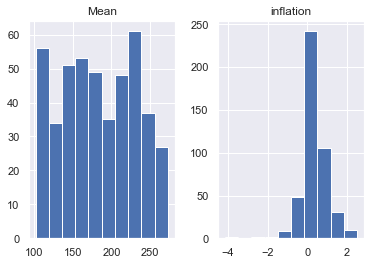

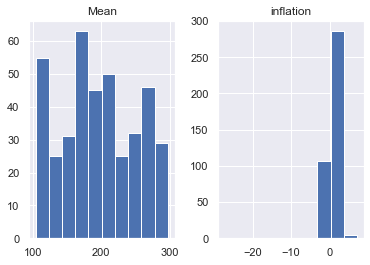

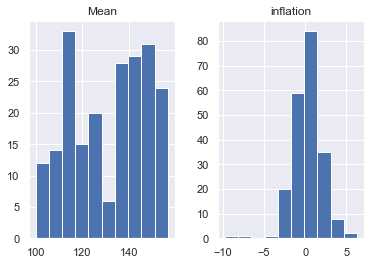

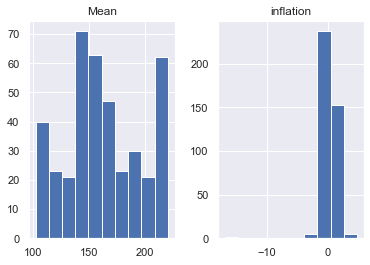

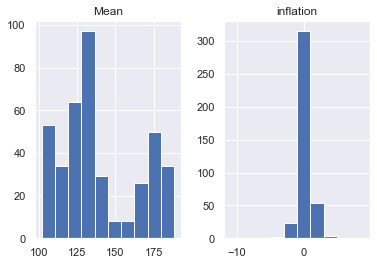

In [85]:
cpi21v1.hist()
ocpi.hist()
f29.hist()
f11.hist()
f4.hist()

The above histagrams show that while the means may fluctuate between data sets and spread across a large range of values, the inflation rate for all datasets typically hovers between -1 and 1 percent month over month. 

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'Spend'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

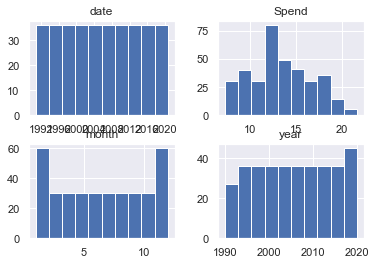

In [86]:
historic.hist()

array([[<AxesSubplot:title={'center':'date'}>]], dtype=object)

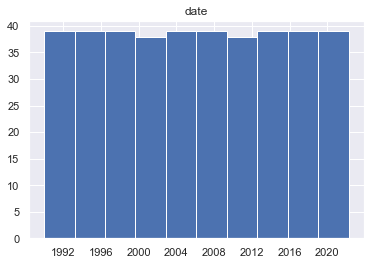

In [87]:
h2.hist()

Next the national CPI data will be looked at to see if there is a trend for inflation rates depending on month. 

<AxesSubplot:title={'center':'inflation'}, xlabel='period'>

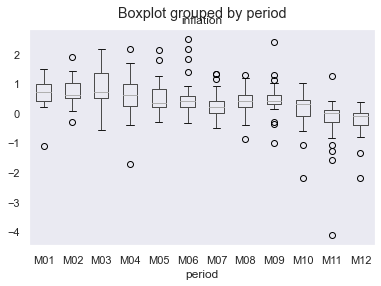

In [88]:
cpi21v1.boxplot(by ='period', column =['inflation'], grid = False)


array([<AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period'>, <AxesSubplot:xlabel='period'>,
       <AxesSubplot:xlabel='period

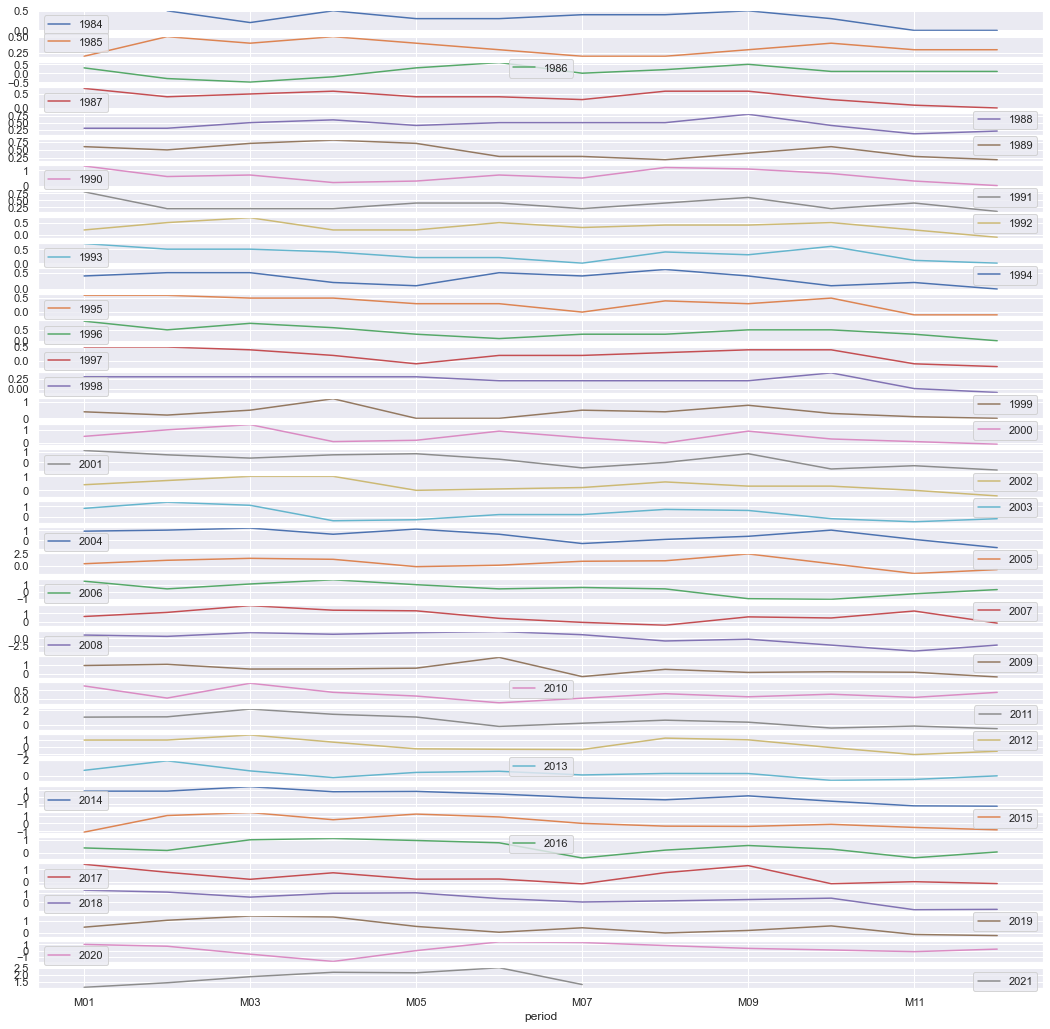

In [89]:
pd.pivot_table(cpi21v1.reset_index(),
               index='period', columns='year', values='inflation'
              ).plot(subplots=True,figsize=(18,18))

<AxesSubplot:xlabel='period', ylabel='year'>

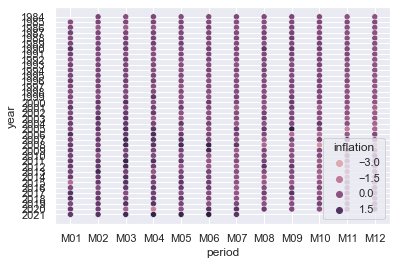

In [91]:
sns.scatterplot(data=cpi21v1,x='period', y='year',hue='inflation')


<AxesSubplot:xlabel='period', ylabel='inflation'>

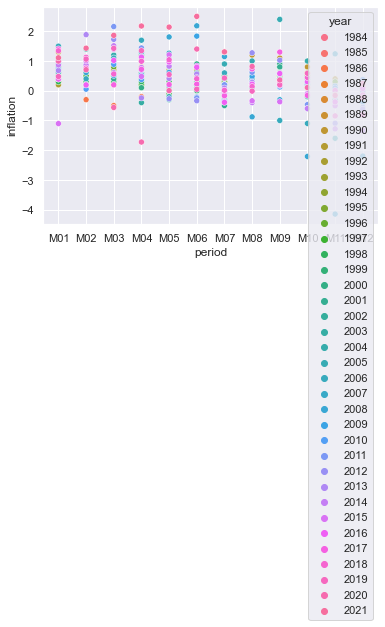

In [92]:
sns.scatterplot(data=cpi21v1,x='period', y='inflation',hue='year')


The four charts above show that there is little to no seasonal correlation between inflation rates. 

The next charts will be looking at if there are any outliers for inflation rate depending on the month. 

<AxesSubplot:xlabel='year', ylabel='Mean'>

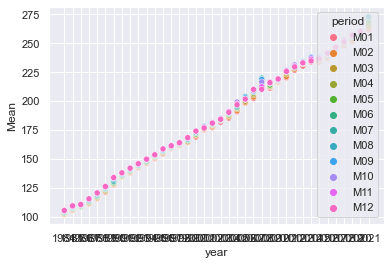

In [93]:
sns.scatterplot(data=cpi21v1,x='year', y='Mean',hue='period')

<AxesSubplot:xlabel='year', ylabel='Mean'>

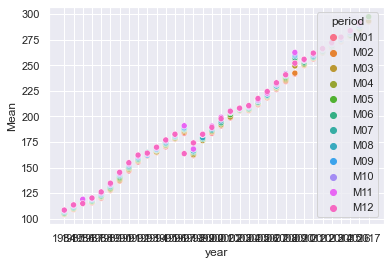

In [94]:
sns.scatterplot(data=ocpi,x='year', y='Mean',hue='period')

<AxesSubplot:xlabel='year', ylabel='Mean'>

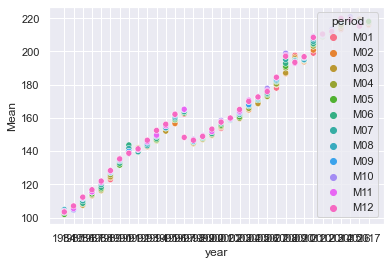

In [95]:
sns.scatterplot(data=f11,x='year', y='Mean',hue='period',linestyle='-')

<AxesSubplot:xlabel='year', ylabel='Mean'>

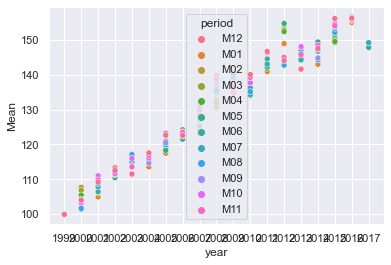

In [96]:
sns.scatterplot(data=f29,x='year', y='Mean',hue='period')

<AxesSubplot:xlabel='year', ylabel='Mean'>

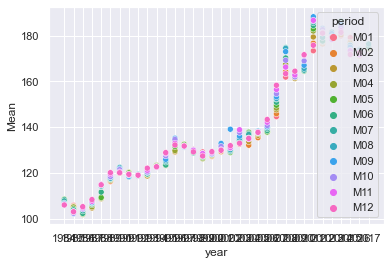

In [97]:
sns.scatterplot(data=f4,x='year', y='Mean',hue='period')

There were no major outliers in any of the datasets. 

The next set of charts will be used to compare trends of the mean and inflation rate against each dataset. This will be used to discover if any of the trends correlate to one another 

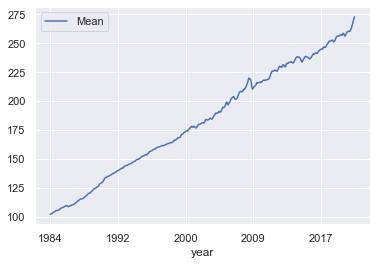

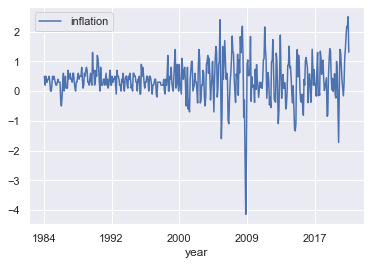

In [98]:
cpi21v1.plot(x='year',y='Mean',kind='line');
cpi21v1.plot(x='year',y='inflation',kind='line');


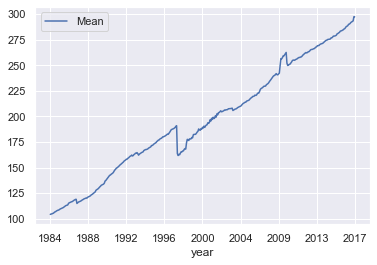

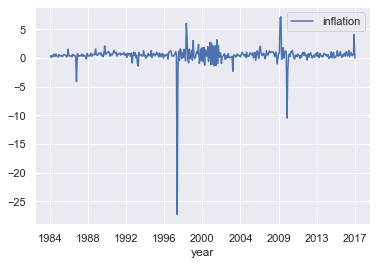

In [99]:
ocpi.plot(x='year',y='Mean',kind='line');
ocpi.plot(x='year',y='inflation',kind='line');

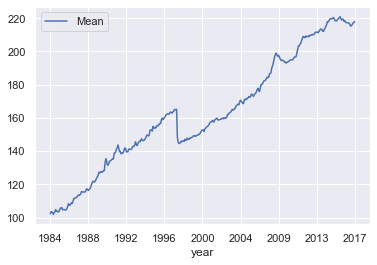

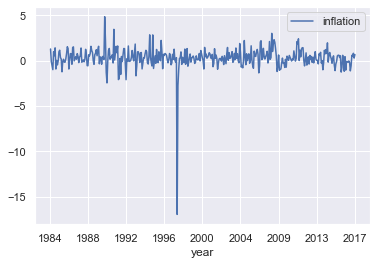

In [100]:
f11.plot(x='year',y='Mean',kind='line');
f11.plot(x='year',y='inflation',kind='line');

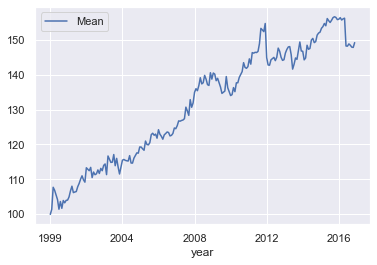

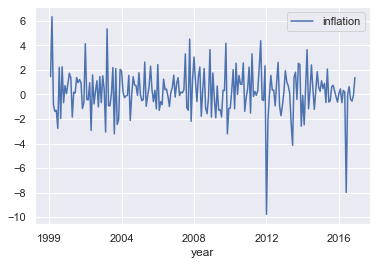

In [101]:
f29.plot(x='year',y='Mean',kind='line');
f29.plot(x='year',y='inflation',kind='line');

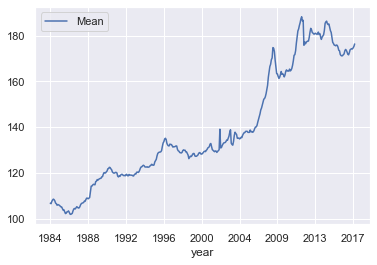

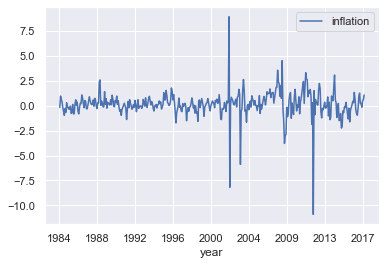

In [102]:
f4.plot(x='year',y='Mean',kind='line');
f4.plot(x='year',y='inflation',kind='line');

After analyzing the datasets seperately, it is clear to see that the means in each dataset follow a similar trend, as well as their inflation rates. Now to further analyze them together, the datasets will be combined. 

In [103]:
result = pd.merge(cpi21v1, ocpi, how="right", on=["year", "period"])
result.rename(columns = {'Mean_x':'CPI_Mean', 'inflation_x':'CPI_inflation', 'Mean_y':'CPIO_Mean', 'inflation_y':'CPIO_inflation' }, inplace = True)
result.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation
0,1984,M01,101.9,NaN,104.200000,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889
2,1984,M03,102.6,0.2,104.700000,0.111111
3,1984,M04,103.1,0.5,105.122222,0.422222
4,1984,M05,103.4,0.3,105.344444,0.222222


In [104]:
result = pd.merge(result, f11, how="right", on=["year", "period"])
result.rename(columns = {'Mean':'F11_Mean', 'inflation':'F11_inflation' }, inplace = True)
result.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,101.9,NaN,104.200000,NaN,102.2536,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889,103.5312,1.2776
2,1984,M03,102.6,0.2,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,103.1,0.5,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,103.4,0.3,105.344444,0.222222,101.8680,-0.9944


In [105]:
result = pd.merge(result, f29, how="left", on=["year", "period"])
result.rename(columns = {'Mean':'F29_Mean', 'inflation':'F29_inflation' }, inplace = True)
result.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,F29_Mean,F29_inflation
0,1984,M01,101.9,NaN,104.200000,NaN,102.2536,NaN,NaN,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889,103.5312,1.2776,NaN,NaN
2,1984,M03,102.6,0.2,104.700000,0.111111,103.4184,-0.1128,NaN,NaN
3,1984,M04,103.1,0.5,105.122222,0.422222,102.8624,-0.5560,NaN,NaN
4,1984,M05,103.4,0.3,105.344444,0.222222,101.8680,-0.9944,NaN,NaN


In [106]:
result = pd.merge(result, f4, how="left", on=["year", "period"])
result.rename(columns = {'Mean':'F4_Mean', 'inflation':'F4_inflation' }, inplace = True)
result.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,F29_Mean,F29_inflation,F4_Mean,F4_inflation
0,1984,M01,101.9,NaN,104.200000,NaN,102.2536,NaN,NaN,NaN,106.672159,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889,103.5312,1.2776,NaN,NaN,106.509659,-0.162500
2,1984,M03,102.6,0.2,104.700000,0.111111,103.4184,-0.1128,NaN,NaN,107.486364,0.976705
3,1984,M04,103.1,0.5,105.122222,0.422222,102.8624,-0.5560,NaN,NaN,108.105682,0.619318
4,1984,M05,103.4,0.3,105.344444,0.222222,101.8680,-0.9944,NaN,NaN,108.486441,0.380759


A heat map will be generated to see what the correlation is between the different datasets. 

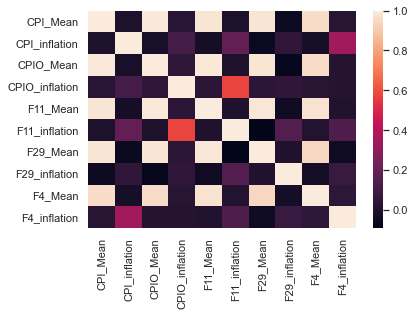

In [107]:
_ = sns.heatmap(result.corr())

When evalutating the heat map, the strongest correlation between a CPI dataset and a food dataset is is the first F&B dataset (F11) to the non-F&B market basket dataset (CPIO). Due to this these two datasets will be further evaluated, prior to training the machine learning module. 

In [108]:
result.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,F29_Mean,F29_inflation,F4_Mean,F4_inflation
0,1984,M01,101.9,NaN,104.200000,NaN,102.2536,NaN,NaN,NaN,106.672159,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889,103.5312,1.2776,NaN,NaN,106.509659,-0.162500
2,1984,M03,102.6,0.2,104.700000,0.111111,103.4184,-0.1128,NaN,NaN,107.486364,0.976705
3,1984,M04,103.1,0.5,105.122222,0.422222,102.8624,-0.5560,NaN,NaN,108.105682,0.619318
4,1984,M05,103.4,0.3,105.344444,0.222222,101.8680,-0.9944,NaN,NaN,108.486441,0.380759


In [109]:
#A copy of the combined dataset is created to preventing having to re-generate this dataset if needed for later. 
results1 = result.copy()
results1.head()

,year,period,CPI_Mean,CPI_inflation,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,F29_Mean,F29_inflation,F4_Mean,F4_inflation
0,1984,M01,101.9,NaN,104.200000,NaN,102.2536,NaN,NaN,NaN,106.672159,NaN
1,1984,M02,102.4,0.5,104.588889,0.388889,103.5312,1.2776,NaN,NaN,106.509659,-0.162500
2,1984,M03,102.6,0.2,104.700000,0.111111,103.4184,-0.1128,NaN,NaN,107.486364,0.976705
3,1984,M04,103.1,0.5,105.122222,0.422222,102.8624,-0.5560,NaN,NaN,108.105682,0.619318
4,1984,M05,103.4,0.3,105.344444,0.222222,101.8680,-0.9944,NaN,NaN,108.486441,0.380759


In [110]:
#Columns are dropped for all datasets beside the non-F&B market basket CPIs and the first F&B CPI data.
results1.drop(['CPI_Mean', 'CPI_inflation','F4_Mean', 'F4_inflation','F29_Mean', 'F29_inflation' ], axis=1, inplace=True)

In [111]:
results1.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,NaN,102.2536,NaN
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [112]:
#Columns are evaluted to determine if there are any missing or null values. 
results1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            401 non-null    object 
 1   period          401 non-null    object 
 2   CPIO_Mean       401 non-null    float64
 3   CPIO_inflation  400 non-null    float64
 4   F11_Mean        401 non-null    float64
 5   F11_inflation   400 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.9+ KB


In [113]:
#The dataset needs to be evaluated for where inflation is missing a value
results1.head().sort_values(by = 'year', axis=0, ascending=True, inplace=False)

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,NaN,102.2536,NaN
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [114]:
#Because inflation was determined by the difference between month 1 and month 2, the first month of our dataset is null. 
#Considering that the baseline year for inflation was 1984, we will assume the first month of that year has an inflation rate of 0. 
results1['CPIO_inflation'] = results1['CPIO_inflation'].replace(np.nan, 0)
results1['F11_inflation'] = results1['F11_inflation'].replace(np.nan, 0)
results1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            401 non-null    object 
 1   period          401 non-null    object 
 2   CPIO_Mean       401 non-null    float64
 3   CPIO_inflation  401 non-null    float64
 4   F11_Mean        401 non-null    float64
 5   F11_inflation   401 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.9+ KB


## Supervised Machine Learning 
Now that the dataset has been cleaned, multiple machine learning modules will be tested. 

##### KNN Module 

In [115]:
results1.shape

(401, 6)

In [116]:
#The goal of this project is to predict food and beverage inflations rates, therefore the target column will for F11_inflation.
cols = results1.columns
target_col = 'F11_inflation'
feat_cols = [c for c in cols if c != target_col]

array = results1.values

X = array[:, 2:4]
y = array[:, 5]

In [117]:
y

array([0.0, 1.2775999999999925, -0.11280000000000712, -0.5559999999999974,
       -0.9943999999999988, 0.9759999999999991, 0.5400000000000063,
       1.4031999999999982, -0.9255999999999887, 0.023199999999988563,
       -0.4744000000000028, -0.04720000000000368, 0.9780698412698428,
       1.1420634920634996, 0.33730158730158166, 0.17301587301588484,
       -1.232539682539695, -0.07936507936507553, 0.14999999999999147,
       -0.1698412698412568, -0.17777777777777715, 0.19285714285713595,
       0.7730158730158792, 1.528571428571425, 1.3285714285714363,
       -0.9269841269841379, 0.06190476190477057, 0.7761904761904646,
       0.7412698412698404, -0.399206349206338, 1.4452380952380963,
       1.5103174603174523, -0.03174603174602453, 0.19841269841269593,
       0.4404761904761898, 0.154761904761898, 0.7689435336976373,
       0.47213114754097774, -0.22049180327869067, 0.37049180327869635,
       0.5368852459016438, 1.3901639344262264, -0.1860655737704917,
       -0.05655737704917385, 0

In [118]:
#A training and testing dataset will be created. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
#A regression KNN module will be used because inflation rates are cosnidered continuous
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [120]:
#Gather the predictations from the module
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1.0250194035279208 0.46414042553192303 0.19841269841269593
 0.3279279279279308 -1.5183206106870557 3.4437522019964604
 -0.12492946058091547 0.45496183206108753 -0.05602879665380556
 1.1347517730496293 0.023199999999988563 1.2125767634854583
 0.8844262295081933 4.827395517867984 0.3734712096414228
 -0.1860655737704917 2.2103448275862263 2.1878974358974403
 0.7572052401746419 0.5581081081081152 1.1269230769230774
 0.17301587301588484 -0.04109128630705072 0.13650622406640878 0.0
 0.5027717842323511 -0.6364963503649506 -0.05646666666666533
 0.33831950207468253 -0.08432835820897822 0.5764398340248817
 0.08303982715747793 -0.2910900880728491 -0.017213114754085268
 0.03347302904566618 0.9773722627737129 -1.6751824817518468
 0.2796182572614043 0.5834482758620538 0.2167832167831989
 -0.5819709543568479 1.1098360655737736 -0.0800000000000125
 -0.9269841269841379 0.6484615384615324 -0.7455809128630619
 -0.8916666666666799 -0.6138248847926207 0.7730158730158792
 -0.41387

In [121]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0.7509838213008588 -0.21643877068556583 0.0810217711856988
 -0.08168168168168677 -0.911959287531848 3.226609904090793
 0.345652835408013 0.22193232311725333 -0.3217961079451375
 0.6321513002363778 0.505599999999987 0.05419640387271829
 0.2819672131147589 6.034136886735344 -0.5456347435070938
 -0.6200190823141678 2.1987653629895285 1.3818731154396553
 0.8479849376621379 -0.0611111111111029 1.7623076923076915
 0.49788359788361447 0.45673443983402723 -0.20504287690177608
 -0.05679999999999552 0.6731493775933473 -0.9138220220530968
 -0.5151374999999991 -0.23356846473028747 -0.5955223880597297
 0.7468174273858779 -0.22698759299165278 -0.7226103398517314
 -0.6196721311475196 -0.23532979673299792 1.4415191130172502
 -2.188129626753664 0.16358204817888122 0.4147421770342513
 0.0431671126563439 -0.9586925200319836 0.15081967213114922
 1.1179487179487069 -1.462663717581762 0.49666666666666026
 -0.47698755186721087 -1.6319444444444664 -1.123895146072556
 0.258465

In [122]:
# R^2 (coefficient of determination) regression score function.
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

-0.43192921002145446


In [123]:
# Explained variance regression score function
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

-0.39711380790868933


In [124]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

for k in range(2, 40):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['year', 'period', 'CPIO_Mean', 'CPIO_inflation', 'F11_Mean'] 
Target: F11_inflation
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters
Evaluating 20 clusters
Evaluating 21 clusters
Evaluating 22 clusters
Evaluating 23 clusters
Evaluating 24 clusters
Evaluating 25 clusters
Evaluating 26 clusters
Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters
Evaluating 30 clusters
Evaluating 31 clusters
Evaluating 32 clusters
Evaluating 33 clusters
Evaluating 34 clusters
Evaluating 35 clusters
Evaluating 36 clusters
Evaluating 37 clusters
Evaluating 38 clusters
Evaluating 39 clusters


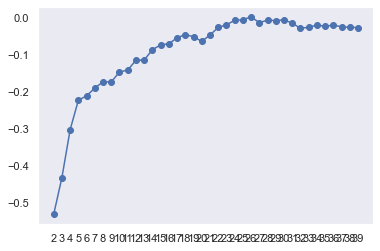

In [125]:
# display the resutls
plt.plot(range(2, 40), scores)
plt.scatter(range(2, 40), scores)
plt.grid()
_ =plt.xticks(range(2, 40))

In [126]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=26, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1.0250194035279208 0.46414042553192303 0.19841269841269593
 0.3279279279279308 -1.5183206106870557 3.4437522019964604
 -0.12492946058091547 0.45496183206108753 -0.05602879665380556
 1.1347517730496293 0.023199999999988563 1.2125767634854583
 0.8844262295081933 4.827395517867984 0.3734712096414228
 -0.1860655737704917 2.2103448275862263 2.1878974358974403
 0.7572052401746419 0.5581081081081152 1.1269230769230774
 0.17301587301588484 -0.04109128630705072 0.13650622406640878 0.0
 0.5027717842323511 -0.6364963503649506 -0.05646666666666533
 0.33831950207468253 -0.08432835820897822 0.5764398340248817
 0.08303982715747793 -0.2910900880728491 -0.017213114754085268
 0.03347302904566618 0.9773722627737129 -1.6751824817518468
 0.2796182572614043 0.5834482758620538 0.2167832167831989
 -0.5819709543568479 1.1098360655737736 -0.0800000000000125
 -0.9269841269841379 0.6484615384615324 -0.7455809128630619
 -0.8916666666666799 -0.6138248847926207 0.7730158730158792
 -0.41387

In [127]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[0.3124436198472219 -0.19716845832687657 -0.25774985488100444
 -0.03896367056116262 -1.6193622217391805 3.4171560463467774
 -0.14081857311948254 0.40519405401356434 -0.396990206034994
 0.6669785070185347 -0.26214696050762687 0.9695453239706157
 0.40857131588059414 4.430882667423139 0.006460192150533728
 -0.6422281270641921 1.8662103788716553 1.5096176063683635
 0.44274222129184493 0.11235257007671551 0.9807984035620647
 -0.1123310874917306 -0.05698039884561778 -0.02744546551543381
 -0.28534696050761543 0.4868826716937841 -0.8348101177167881
 -0.610551214847794 0.20215991062878275 -0.2967803185659396
 0.5605507214863147 -0.26602332839518483 -0.6400291275326173
 -0.47000963624816666 -0.43628100417359517 0.8574610631866073
 -1.8734962491036844 0.26372914472283726 0.2710112623665664
 -0.30054533846425413 -0.9700012262279435 0.6317822858838773
 -0.2549871917711587 -1.2314372785684367 0.6781666294556749
 -0.8097724225981394 -1.3218444688808557 -1.04172812062

An R2 score this low, makes this machine learning module unusable and will not be used for forecasting. 

Due to the low R2 score we will run a series of machine learning models to see if we are able to find the appropriate model for this dataset. The machine learning models that will be evaluated are: Linear Regression, Lasso, Elastic Net, KNN, Decision Tree Regressor and SVR. 

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [129]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [130]:
# evaluate each model in turn
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [131]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    CPIO_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(CPIO_inflation)

LR: -1.845814 (1.705004)
LASSO: -1.666436 (1.780482)
EN: -1.716253 (1.764317)
KNN: -1.637279 (1.618494)
CART: -2.162855 (1.802296)
SVR: -1.690999 (1.769951)


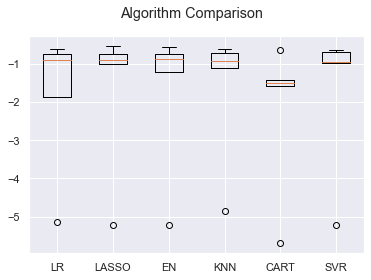

In [132]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

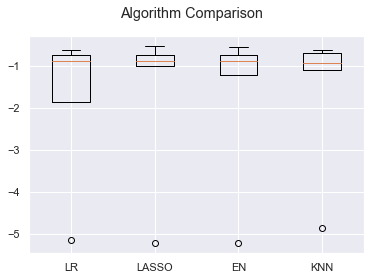

In [133]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[0:-2])
ax.set_xticklabels(names[0:-2])
pyplot.show()

All values are below 0, which shows that none of the above models will work with this dataset. 

Next we will scale the dataset and see if any of the scores improve. 

In [136]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='auto'))])))

In [137]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    CPI_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(CPI_inflation)

ScaledLR: -1.845814 (1.705004)
ScaledLASSO: -1.610792 (1.805968)
ScaledEN: -1.637353 (1.792885)
ScaledKNN: -1.610079 (1.636166)
ScaledCART: -2.146701 (1.709335)
ScaledSVR: -1.586201 (1.758912)


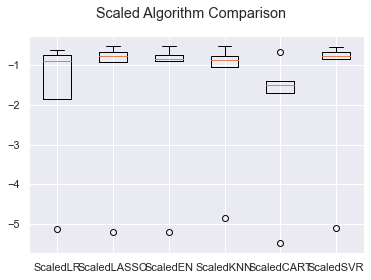

In [138]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

All of the models still produced low scores and are therefore not usable to this project. 

Finally for this dataset we will try bootstrapping aggragating to see if that will bring any of the scores closer to 0.0. 

In [139]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [140]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    CPIO_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(CPIO_inflation)

ScaledAB: -1.573302 (1.732179)
ScaledGBM: -1.636282 (1.667706)
ScaledRF: -1.813827 (1.830283)
ScaledET: -1.684969 (1.556773)


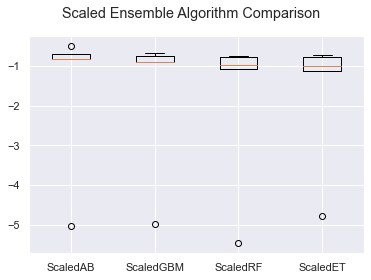

In [141]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Bootsrapping improved our scores slightly, but now enough to be able to train a good model with. 

The data will now be re-evaluated to see if presenting it in a slightly different way will help. 

In [142]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [143]:
#A duplicate dataset is generated to work off of 
results2= results1.copy()
results2.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,0.000000,102.2536,0.0000
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [144]:
#The date information from the dataset will be combined to see if the linear regression model will improve.
#The first step is to format the year and period columns
results2['period'] = results2['period'].map(lambda x: x.lstrip('M').rstrip('aAbBcC'))
results2["year"] = results2["year"].astype(str).astype(int)
results2["period"] = results2["period"].astype(str).astype(int)
results2.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,1,104.200000,0.000000,102.2536,0.0000
1,1984,2,104.588889,0.388889,103.5312,1.2776
2,1984,3,104.700000,0.111111,103.4184,-0.1128
3,1984,4,105.122222,0.422222,102.8624,-0.5560
4,1984,5,105.344444,0.222222,101.8680,-0.9944


In [145]:
#Verify that all rows have data in them
results2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            401 non-null    int64  
 1   period          401 non-null    int64  
 2   CPIO_Mean       401 non-null    float64
 3   CPIO_inflation  401 non-null    float64
 4   F11_Mean        401 non-null    float64
 5   F11_inflation   401 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 21.9 KB


In [146]:
#Update the period column to be read as a month
results2.rename(columns = {'period':'month'}, inplace = True)


In [147]:
#Combine the year and month columns into a date column
results2['date'] = pd.to_datetime(results2[['year', 'month']].assign(DAY=1))
results2.head()

,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,date
0,1984,1,104.200000,0.000000,102.2536,0.0000,1984-01-01
1,1984,2,104.588889,0.388889,103.5312,1.2776,1984-02-01
2,1984,3,104.700000,0.111111,103.4184,-0.1128,1984-03-01
3,1984,4,105.122222,0.422222,102.8624,-0.5560,1984-04-01
4,1984,5,105.344444,0.222222,101.8680,-0.9944,1984-05-01


In [148]:
#Remove the year, month, and mean columns 
#Make the date column the index
results2.drop(['year', 'month','CPIO_Mean','F11_Mean'], axis=1, inplace=True)
r2=results2.set_index('date').reset_index()

In [149]:
r2.head()

,date,CPIO_inflation,F11_inflation
0,1984-01-01,0.000000,0.0000
1,1984-02-01,0.388889,1.2776
2,1984-03-01,0.111111,-0.1128
3,1984-04-01,0.422222,-0.5560
4,1984-05-01,0.222222,-0.9944


In [150]:
cols = r2.columns
target_col = 'F11_inflation'
feat_cols = [c for c in cols if c != target_col]

array = r2.values

X1 = array[:, 1].reshape(-1, 1)
y1 = array[:, 2]

In [151]:
y1

array([0.0, 1.2775999999999925, -0.11280000000000712, -0.5559999999999974,
       -0.9943999999999988, 0.9759999999999991, 0.5400000000000063,
       1.4031999999999982, -0.9255999999999887, 0.023199999999988563,
       -0.4744000000000028, -0.04720000000000368, 0.9780698412698428,
       1.1420634920634996, 0.33730158730158166, 0.17301587301588484,
       -1.232539682539695, -0.07936507936507553, 0.14999999999999147,
       -0.1698412698412568, -0.17777777777777715, 0.19285714285713595,
       0.7730158730158792, 1.528571428571425, 1.3285714285714363,
       -0.9269841269841379, 0.06190476190477057, 0.7761904761904646,
       0.7412698412698404, -0.399206349206338, 1.4452380952380963,
       1.5103174603174523, -0.03174603174602453, 0.19841269841269593,
       0.4404761904761898, 0.154761904761898, 0.7689435336976373,
       0.47213114754097774, -0.22049180327869067, 0.37049180327869635,
       0.5368852459016438, 1.3901639344262264, -0.1860655737704917,
       -0.05655737704917385, 0

In [152]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [153]:
model1 = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
model.fit(X_train1, y_train1)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('ET', ExtraTreesRegressor(n_estimators=10))])

In [154]:
# gather the predictations that our model made for our test set
preds1 = model.predict(X_test1)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test1)
print('Predictions for test data set')
print(preds1)

Actuals for test data set
[1.0250194035279208 0.46414042553192303 0.19841269841269593
 0.3279279279279308 -1.5183206106870557 3.4437522019964604
 -0.12492946058091547 0.45496183206108753 -0.05602879665380556
 1.1347517730496293 0.023199999999988563 1.2125767634854583
 0.8844262295081933 4.827395517867984 0.3734712096414228
 -0.1860655737704917 2.2103448275862263 2.1878974358974403
 0.7572052401746419 0.5581081081081152 1.1269230769230774
 0.17301587301588484 -0.04109128630705072 0.13650622406640878 0.0
 0.5027717842323511 -0.6364963503649506 -0.05646666666666533
 0.33831950207468253 -0.08432835820897822 0.5764398340248817
 0.08303982715747793 -0.2910900880728491 -0.017213114754085268
 0.03347302904566618 0.9773722627737129 -1.6751824817518468
 0.2796182572614043 0.5834482758620538 0.2167832167831989
 -0.5819709543568479 1.1098360655737736 -0.0800000000000125
 -0.9269841269841379 0.6484615384615324 -0.7455809128630619
 -0.8916666666666799 -0.6138248847926207 0.7730158730158792
 -0.41387

In [155]:
#compare the two sets for 'subscribed'
differs1 = y_test1 - preds1
print('Differences between the two sets')
print(differs1)

Differences between the two sets
[0.005988670667386398 0.4656386991756051 -1.9276746976263808
 -0.8800355099625108 -2.317998889496374 3.2228510614434525
 -0.7227983130399395 2.555708100717794 0.5445533442314968
 1.272656695693803 -1.254400000000004 1.3179202749358296
 0.8320124364047672 4.4099634227157365 -0.40708434591411446
 -1.2745411348961397 1.3150101622515478 1.813926167038855
 0.5251771107794241 0.8390768170725579 1.1076736975789232
 -0.01984126984125112 -0.34206672070421573 0.49634231135627827
 0.7783355973857112 0.25931018869066236 -0.2988745015111249
 -0.5775535399923417 0.34177133005205745 -0.9324199612624113
 0.7844690311051465 -0.28419415163459405 0.06009101428936958
 0.39262295081968546 -1.0458025535277955 1.5458130249644768
 -2.550894997846285 -0.589126252809774 0.36037679179058557
 -0.637961308764261 -1.5122945501404217 0.9656981345393092
 -0.25419872137407823 -0.5385432989358065 -0.11177467676192454
 -1.2019279649772614 -1.739758269720113 -0.6119362385044156
 0.2577875

In [156]:
from sklearn.metrics import r2_score

print(r2_score(y_test1,preds1))

-0.44201841108312334


In [157]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test1,preds1))

-0.4394835723280639


In [158]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 30):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train1, y_train1)
    scores.append(model.score(X_test1, y_test1))

Features: ['date', 'CPIO_inflation'] 
Target: F11_inflation
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters
Evaluating 20 clusters
Evaluating 21 clusters
Evaluating 22 clusters
Evaluating 23 clusters
Evaluating 24 clusters
Evaluating 25 clusters
Evaluating 26 clusters
Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters


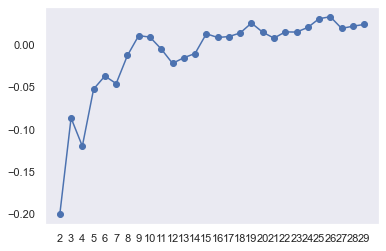

In [159]:
# display the resutls
plt.plot(range(2, 30), scores)
plt.scatter(range(2, 30), scores)
plt.grid()
_ =plt.xticks(range(2, 30))

In [160]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=26, n_jobs=-1)
model.fit(X_train1, y_train1)

# gather the predictations that our model made for our test set
preds1 = model.predict(X_test1)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test1)
print('Predictions for test data set')
print(preds1)

Actuals for test data set
[1.0250194035279208 0.46414042553192303 0.19841269841269593
 0.3279279279279308 -1.5183206106870557 3.4437522019964604
 -0.12492946058091547 0.45496183206108753 -0.05602879665380556
 1.1347517730496293 0.023199999999988563 1.2125767634854583
 0.8844262295081933 4.827395517867984 0.3734712096414228
 -0.1860655737704917 2.2103448275862263 2.1878974358974403
 0.7572052401746419 0.5581081081081152 1.1269230769230774
 0.17301587301588484 -0.04109128630705072 0.13650622406640878 0.0
 0.5027717842323511 -0.6364963503649506 -0.05646666666666533
 0.33831950207468253 -0.08432835820897822 0.5764398340248817
 0.08303982715747793 -0.2910900880728491 -0.017213114754085268
 0.03347302904566618 0.9773722627737129 -1.6751824817518468
 0.2796182572614043 0.5834482758620538 0.2167832167831989
 -0.5819709543568479 1.1098360655737736 -0.0800000000000125
 -0.9269841269841379 0.6484615384615324 -0.7455809128630619
 -0.8916666666666799 -0.6138248847926207 0.7730158730158792
 -0.41387

In [161]:
differs1 = y_test1 - preds1

print(f'Differences between the two sets:\n{differs1}\n')

print(f'r2_score: {r2_score(y_test1,preds1)}')

Differences between the two sets:
[0.35335126388743876 0.11919368142486175 -0.18239750745999844
 0.2560470688966528 -2.0820845658994123 3.0455184393420107
 -0.5725014370166586 0.12907946355378147 -0.12790965568508356
 0.9256969282462234 -0.24509019371253515 0.8301199974319666
 0.48921608590132426 4.45501704282886 -0.04642769481159914
 -0.6096967000813797 1.8415959369077086 2.0337474481606654
 0.545649319363911 0.3646846983188129 0.7591100242929207
 -0.0809030229141553 -0.43204823972584944 -0.06995606300392482
 -0.17096075648916226 0.11736182636925246 -1.061773802958739
 -0.677391997079099 0.009241716786867471 -0.2617774402379649
 0.10868685398746708 -0.26280435716644324 -0.3920744729181153
 -0.3296065531178485 -0.3100053255368226 0.9033626999804029
 -1.846143238241009 -0.061735560864407235 0.23324959132899237
 -0.2744015350768511 -0.9320192808566192 0.7247164520684946
 -0.5327840329312247 -1.3097519035553753 0.09369513682443487
 -1.0718170489385666 -1.0691157486956666 -0.82109981131370

The updates to the dataset made a stronger KNN model. Now, we will test to see how other models compare with the new dataset. 

In [162]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [163]:
# evaluate each model in turn
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [164]:
r2 = []
names = []
for name, model1 in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model1, X_train1, y_train1, cv=kfold, scoring=scoring)
    r2.append(cv_results)
    names.append(name)
    F11_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(F11_inflation)

LR: -1.841628 (1.701624)
LASSO: -1.664869 (1.781308)
EN: -1.713877 (1.763816)
KNN: -1.678792 (1.669974)
CART: -2.479449 (1.821940)
SVR: -1.587892 (1.755938)


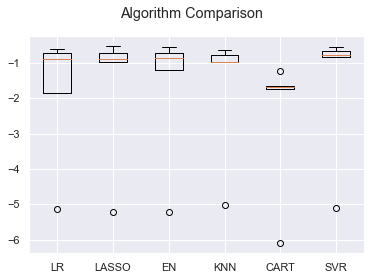

In [165]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(r2)
ax.set_xticklabels(names)
pyplot.show()

The above information shows that a KNN model is best suited for this dataset. 

Next we will scale the dataset and see if any there are any other models we should test.

In [166]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='auto'))])))

In [167]:
results2 = []
names = []
for name, model1 in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model1, X_train1, y_train1, cv=kfold, scoring=scoring)
    results2.append(cv_results)
    names.append(name)
    CPI_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(CPI_inflation)

ScaledLR: -1.841628 (1.701624)
ScaledLASSO: -1.610792 (1.805968)
ScaledEN: -1.637353 (1.792885)
ScaledKNN: -1.678792 (1.669974)
ScaledCART: -2.479449 (1.821940)
ScaledSVR: -1.572555 (1.756168)


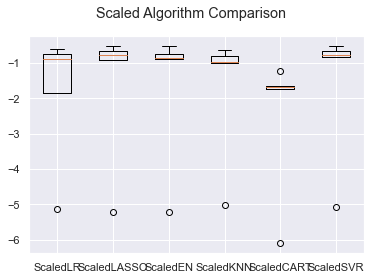

In [168]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results2)
ax.set_xticklabels(names)
pyplot.show()

Scaling helped to improve the Lasso, Elastic Net and KNN models, however not enough to warrant more testing. 

Bootstrapping will be applied to the data to see scores further improve or not. 

In [169]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [170]:
results2 = []
names = []
for name, model1 in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model1, X_train1, y_train1, cv=kfold, scoring=scoring)
    results2.append(cv_results)
    names.append(name)
    CPIO_inflation = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(CPIO_inflation)

ScaledAB: -1.679884 (1.762785)
ScaledGBM: -1.782688 (1.775840)
ScaledRF: -2.077545 (1.771539)
ScaledET: -2.262378 (1.798769)


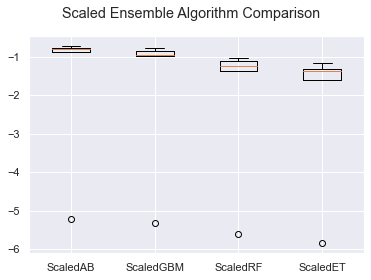

In [171]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results2)
ax.set_xticklabels(names)
pyplot.show()

The un-tuned data generated better scores than most of the algorithms above, however, still not enough to continue testing additional models. 

##### Linear Regression

In [172]:
results2= results1.copy()
results2.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,0.000000,102.2536,0.0000
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [173]:
results2['period'] = results2['period'].map(lambda x: x.lstrip('M').rstrip('aAbBcC'))
results2["year"] = results2["year"].astype(str).astype(int)
results2["period"] = results2["period"].astype(str).astype(int)
results2.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,1,104.200000,0.000000,102.2536,0.0000
1,1984,2,104.588889,0.388889,103.5312,1.2776
2,1984,3,104.700000,0.111111,103.4184,-0.1128
3,1984,4,105.122222,0.422222,102.8624,-0.5560
4,1984,5,105.344444,0.222222,101.8680,-0.9944


In [174]:
#Update the period column to be read as a month
results2.rename(columns = {'period':'month'}, inplace = True)

In [175]:
results2['date'] = pd.to_datetime(results2[['year', 'month']].assign(DAY=1))
results2.head()

,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,date
0,1984,1,104.200000,0.000000,102.2536,0.0000,1984-01-01
1,1984,2,104.588889,0.388889,103.5312,1.2776,1984-02-01
2,1984,3,104.700000,0.111111,103.4184,-0.1128,1984-03-01
3,1984,4,105.122222,0.422222,102.8624,-0.5560,1984-04-01
4,1984,5,105.344444,0.222222,101.8680,-0.9944,1984-05-01


In [176]:
#Remove the year, month, and mean columns 
#Make the date column the index
results2.drop(['year', 'month','CPIO_Mean','F11_Mean'], axis=1, inplace=True)
r2=results2.set_index('date').reset_index()
r2.head()

,date,CPIO_inflation,F11_inflation
0,1984-01-01,0.000000,0.0000
1,1984-02-01,0.388889,1.2776
2,1984-03-01,0.111111,-0.1128
3,1984-04-01,0.422222,-0.5560
4,1984-05-01,0.222222,-0.9944


<AxesSubplot:xlabel='date'>

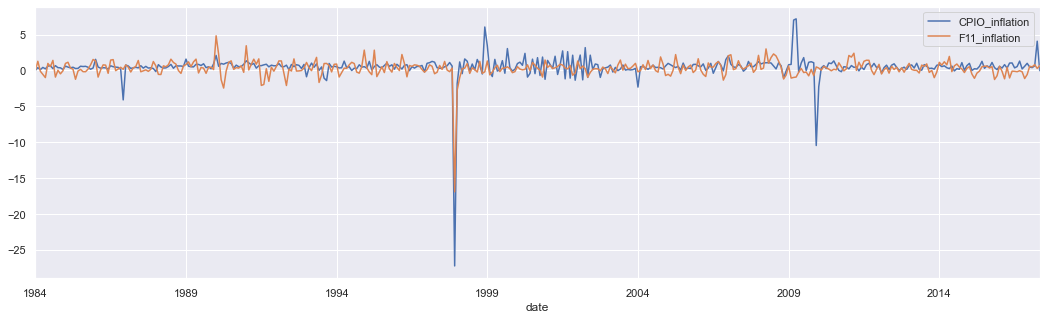

In [177]:
r2.plot(x='date', y=["CPIO_inflation", "F11_inflation"], figsize=(18,5))

In [178]:
cols = r2.columns
target_col = 'F11_inflation'
feat_cols = [c for c in cols if c != target_col]

array = r2.values

X3 = array[:, 1].reshape(-1, 1)
y3 = array[:, 2].reshape(-1, 1)

In [179]:
y3

array([[0.0],
       [1.2775999999999925],
       [-0.11280000000000712],
       [-0.5559999999999974],
       [-0.9943999999999988],
       [0.9759999999999991],
       [0.5400000000000063],
       [1.4031999999999982],
       [-0.9255999999999887],
       [0.023199999999988563],
       [-0.4744000000000028],
       [-0.04720000000000368],
       [0.9780698412698428],
       [1.1420634920634996],
       [0.33730158730158166],
       [0.17301587301588484],
       [-1.232539682539695],
       [-0.07936507936507553],
       [0.14999999999999147],
       [-0.1698412698412568],
       [-0.17777777777777715],
       [0.19285714285713595],
       [0.7730158730158792],
       [1.528571428571425],
       [1.3285714285714363],
       [-0.9269841269841379],
       [0.06190476190477057],
       [0.7761904761904646],
       [0.7412698412698404],
       [-0.399206349206338],
       [1.4452380952380963],
       [1.5103174603174523],
       [-0.03174603174602453],
       [0.19841269841269593],
      

In [180]:
model = LinearRegression()

In [181]:
model.fit(X3, y3)


LinearRegression()

In [182]:
model = LinearRegression().fit(X3, y3)

In [183]:
r_sq = model.score(X3, y3)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3308385389776297


In [184]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [0.09628158]
slope: [[0.39970606]]


In [185]:
new_model = LinearRegression().fit(X3, y3.reshape((-1, 1)))

print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [0.09628158]
slope: [[0.39970606]]


In [186]:
y_pred3 = model.predict(X3)

print(f"predicted response:\n{y_pred3}")

predicted response:
[[ 9.62815796e-02]
 [ 2.51722824e-01]
 [ 1.40693364e-01]
 [ 2.65046359e-01]
 [ 1.85105148e-01]
 [ 3.36105214e-01]
 [ 3.67193463e-01]
 [ 1.98428683e-01]
 [ 3.62752284e-01]
 [ 2.51722824e-01]
 [ 2.42840467e-01]
 [ 1.49575721e-01]
 [ 3.36105214e-01]
 [ 2.82811073e-01]
 [ 2.42840467e-01]
 [ 2.73928716e-01]
 [ 2.02869861e-01]
 [ 2.11752218e-01]
 [ 3.31664035e-01]
 [ 3.13899322e-01]
 [ 3.27222857e-01]
 [ 2.73928716e-01]
 [ 1.62899256e-01]
 [ 2.29516932e-01]
 [ 7.14937732e-01]
 [ 2.88140487e-01]
 [ 2.20190457e-01]
 [ 2.48169881e-01]
 [ 2.40175760e-01]
 [ 1.68228670e-01]
 [ 3.56090517e-01]
 [ 3.04128729e-01]
 [ 2.80146366e-01]
 [ 2.68155184e-01]
 [ 1.56237488e-01]
 [-1.54466552e+00]
 [ 3.97598453e-01]
 [ 3.45329200e-01]
 [ 2.13118735e-01]
 [ 2.37716031e-01]
 [ 2.71537312e-01]
 [ 2.37716031e-01]
 [ 3.60702510e-01]
 [ 2.25417383e-01]
 [ 3.23806566e-01]
 [ 2.28492045e-01]
 [ 2.43865354e-01]
 [ 2.03894749e-01]
 [ 2.99567285e-02]
 [ 4.18901468e-01]
 [ 2.90424522e-01]
 [ 2.304686

In [187]:
y_pred3 = model.intercept_ + model.coef_ * X3

print(f"predicted response:\n{y_pred3}")

predicted response:
[[0.09628157964253911]
 [0.2517228239663375]
 [0.14069336373504726]
 [0.2650463591940905]
 [0.18510514782756676]
 [0.33610521374210467]
 [0.3671934626068655]
 [0.19842868305531977]
 [0.36275228419761074]
 [0.2517228239663375]
 [0.2428404671478336]
 [0.14957572055355117]
 [0.33610521374210467]
 [0.28281107283109264]
 [0.24284046714782792]
 [0.2739287160125887]
 [0.20286986146457456]
 [0.21175221828306712]
 [0.33166403533286126]
 [0.3138993216958478]
 [0.3272228569236064]
 [0.2739287160125887]
 [0.16289925578130984]
 [0.2295169319200749]
 [0.7149377320512407]
 [0.2881404869221893]
 [0.2201904572606444]
 [0.24816988123894163]
 [0.2401757601022739]
 [0.1682286698724122]
 [0.35609051658373425]
 [0.304128729195502]
 [0.28014636578553864]
 [0.2681551840805655]
 [0.15623748816743335]
 [-1.5446655167541221]
 [0.397598453254817]
 [0.3453291996690132]
 [0.21311873471668571]
 [0.2377160305217695]
 [0.2715373122537619]
 [0.2377160305217695]
 [0.3607025095471942]
 [0.225417382619

In [188]:
x_new = np.arange(5).reshape((-1, 1))
x_new

y_new = model.predict(x_new)
y_new

array([[0.09628158],
       [0.49598764],
       [0.89569369],
       [1.29539975],
       [1.69510581]])

##### ARIMA

In [189]:
results1.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,0.000000,102.2536,0.0000
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [190]:
r3=results1.dropna()
r3.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,M01,104.200000,0.000000,102.2536,0.0000
1,1984,M02,104.588889,0.388889,103.5312,1.2776
2,1984,M03,104.700000,0.111111,103.4184,-0.1128
3,1984,M04,105.122222,0.422222,102.8624,-0.5560
4,1984,M05,105.344444,0.222222,101.8680,-0.9944


In [191]:
r3['period'] = r3['period'].map(lambda x: x.lstrip('M').rstrip('aAbBcC'))
r3["year"] = r3["year"].astype(str).astype(int)
r3["period"] = r3["period"].astype(str).astype(int)
r3.head()

,year,period,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984,1,104.200000,0.000000,102.2536,0.0000
1,1984,2,104.588889,0.388889,103.5312,1.2776
2,1984,3,104.700000,0.111111,103.4184,-0.1128
3,1984,4,105.122222,0.422222,102.8624,-0.5560
4,1984,5,105.344444,0.222222,101.8680,-0.9944


In [192]:
r3.rename(columns = {'period':'month'}, inplace = True)

In [193]:
r3['date'] = pd.to_datetime(r3[['year', 'month']].assign(DAY=1))
r3.head()

,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,date
0,1984,1,104.200000,0.000000,102.2536,0.0000,1984-01-01
1,1984,2,104.588889,0.388889,103.5312,1.2776,1984-02-01
2,1984,3,104.700000,0.111111,103.4184,-0.1128,1984-03-01
3,1984,4,105.122222,0.422222,102.8624,-0.5560,1984-04-01
4,1984,5,105.344444,0.222222,101.8680,-0.9944,1984-05-01


In [194]:
r3=r3.set_index('date').reset_index()
r3.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984-01-01,1984,1,104.200000,0.000000,102.2536,0.0000
1,1984-02-01,1984,2,104.588889,0.388889,103.5312,1.2776
2,1984-03-01,1984,3,104.700000,0.111111,103.4184,-0.1128
3,1984-04-01,1984,4,105.122222,0.422222,102.8624,-0.5560
4,1984-05-01,1984,5,105.344444,0.222222,101.8680,-0.9944


<AxesSubplot:xlabel='date'>

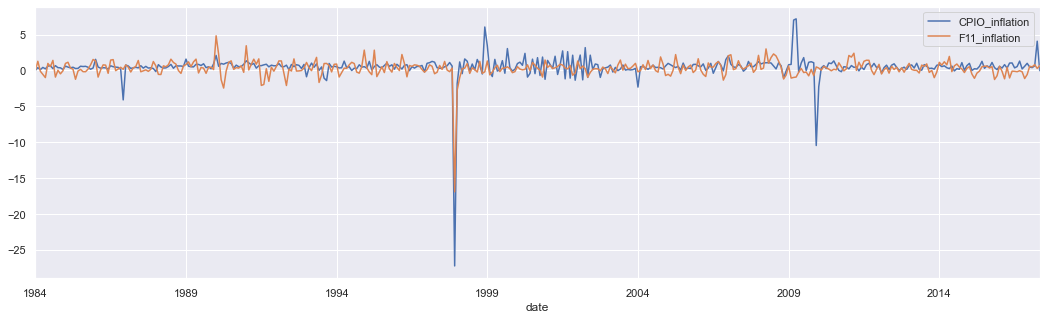

In [195]:
r3.plot(x='date', y=["CPIO_inflation", "F11_inflation"], figsize=(18,5))

In [196]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(r3.F11_inflation)
print(results)

(-16.67740846843657, 1.5265992367110287e-29, 0, 400, {'1%': -3.4468044036406247, '5%': -2.868792838125, '10%': -2.57063355625}, 1233.3009603043663)


In [197]:
from statsmodels.graphics.tsaplots import plot_acf


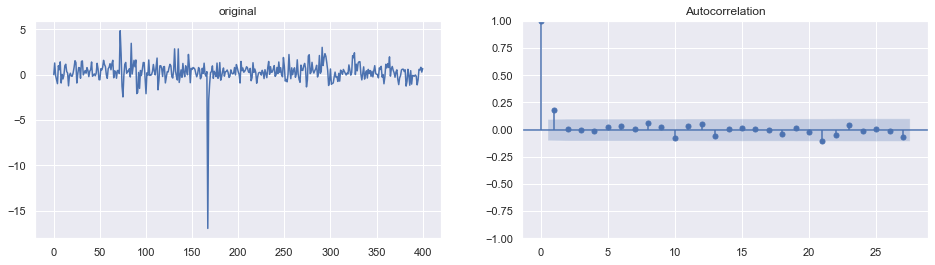

In [198]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(r3.F11_inflation)
ax1.set_title("original")

plot_acf(r3.F11_inflation, ax=ax2);

In [199]:
from pmdarima.arima.utils import ndiffs

In [200]:
ndiffs(r3.F11_inflation, test ='adf')

0

In [201]:
from statsmodels.graphics.tsaplots import plot_pacf

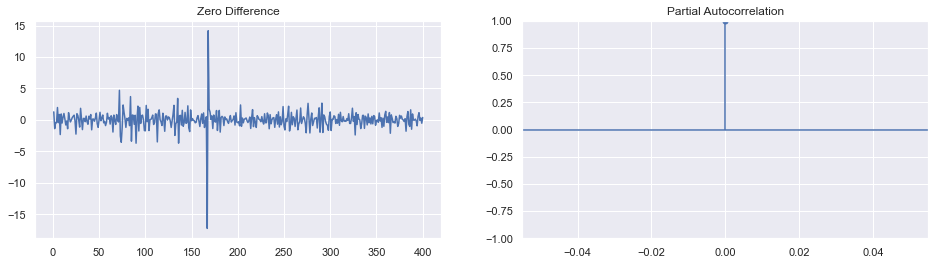

In [202]:
diff = r3.F11_inflation.diff()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Zero Difference")
ax2.set_ylim(0,1)

plot_pacf(diff, ax=ax2);

There are no amounts above the significance line 

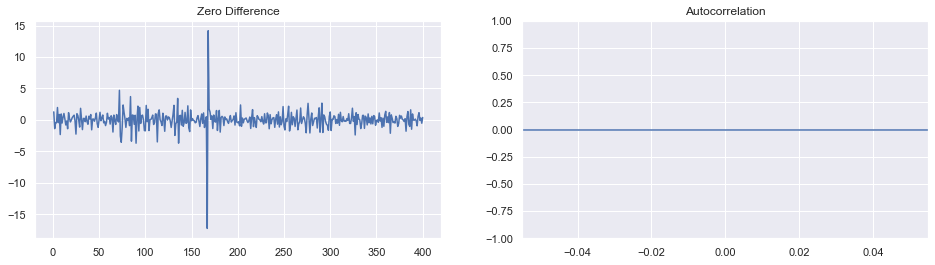

In [203]:
diff = r3.F11_inflation.diff()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Zero Difference")
ax2.set_ylim(0,1)

plot_acf(diff, ax=ax2);

Based off of the above tests, it appears that d = 1 and the p and q values will 0 

In [204]:
y = r3.F11_inflation

## Adf Test
ndiffs(y, test='adf')  # 1

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 0

0

In [205]:
from statsmodels.tsa.arima.model import ARIMA

In [206]:
#train the model 
model = ARIMA(r3.F11_Mean, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               F11_Mean   No. Observations:                  401
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -660.221
Date:                Sun, 26 Jun 2022   AIC                           1326.441
Time:                        22:46:35   BIC                           1338.423
Sample:                             0   HQIC                          1331.186
                                - 401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.2649     65.926      2.461      0.014      33.052     291.478
ar.L1          0.9998      0.003    369.681      0.000       0.994       1.005
sigma2         1.5465      0.017     90.335      0.0

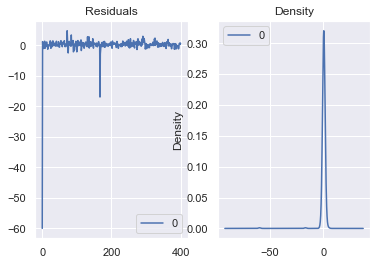

In [207]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [208]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
n= int(len(r3) *.8)
train = r3.F11_inflation[:n]
test = r3.F11_inflation[n:]

print(len(train))
print(len(test))

320
81


In [209]:
# Build Model
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit()  

# Forecast
steps = 81
preds2 = fitted.forecast(steps, alpha = 0.05)
preds2

320    0.256233
321    0.284418
322    0.289008
323    0.289755
324    0.289877
         ...   
396    0.289900
397    0.289900
398    0.289900
399    0.289900
400    0.289900
Name: predicted_mean, Length: 81, dtype: float64

In [210]:
# Make as pandas series
fc_series = pd.Series(preds2, index=test.index)
lower_series = pd.Series(preds2, index=test[:steps].index)
upper_series = pd.Series(preds2, index=test[:steps].index)



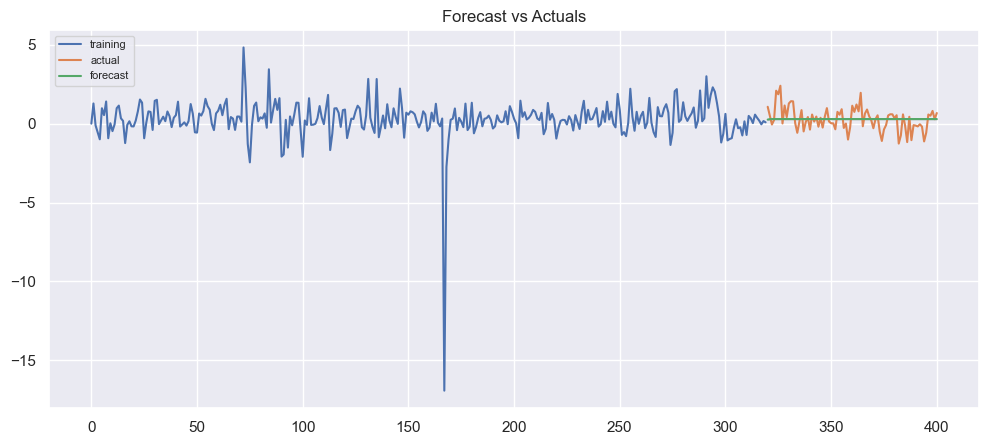

In [211]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The forecast for this model shows that inflation will consistantly increase at 0.29% monthly 

## Data Analysis

The first step to begin analyzing this is data is to combine the machine learning/forecasted datasets. All datasets will have the first 75% of their data represented by the actual inflation rates in the F11 dataset. 

In [212]:
Actuals = r3.F11_inflation[0:320]
Actuals.head()

0    0.0000
1    1.2776
2   -0.1128
3   -0.5560
4   -0.9944
Name: F11_inflation, dtype: float64

In [213]:
##Second KNN Data
###The first KNN dataset will not be used in the final analysis because the scores were poor and the data used for the other tests was uniform to the second KNN test.

KNN_Forecast = Actuals.append(pd.Series(preds1))
KNN_Forecast.head()


0       0.0
1    1.2776
2   -0.1128
3    -0.556
4   -0.9944
dtype: object

In [214]:
KNN_Forecast.shape

(401,)

In [215]:
##Linear Regression 

In [216]:
LR = y_pred3[320:]
LR.shape

(81, 1)

In [217]:
LR_Forecast = pd.DataFrame(LR)
LR_Forecast.head()

,0
0,0.098967
1,0.02386
2,0.304129
3,0.283831
4,0.184367


In [218]:
LR_Forecast = LR_Forecast.iloc[:,0]

In [219]:
LR_Forecast = Actuals.append((LR_Forecast))
LR_Forecast.head()

0       0.0
1    1.2776
2   -0.1128
3    -0.556
4   -0.9944
dtype: object

In [220]:
LR_Forecast.shape

(401,)

In [221]:
##ARIMA

In [222]:
ARIMA_Forecast = preds2
ARIMA_Forecast.shape

(81,)

In [223]:
ARIMA_Forecast = Actuals.append((ARIMA_Forecast))
ARIMA_Forecast.head()

0    0.0000
1    1.2776
2   -0.1128
3   -0.5560
4   -0.9944
dtype: float64

In [224]:
ARIMA_Forecast.shape

(401,)

In [225]:
Final = r3
Final.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation
0,1984-01-01,1984,1,104.200000,0.000000,102.2536,0.0000
1,1984-02-01,1984,2,104.588889,0.388889,103.5312,1.2776
2,1984-03-01,1984,3,104.700000,0.111111,103.4184,-0.1128
3,1984-04-01,1984,4,105.122222,0.422222,102.8624,-0.5560
4,1984-05-01,1984,5,105.344444,0.222222,101.8680,-0.9944


In [226]:
KNN_Forecast = KNN_Forecast.reset_index()

In [227]:
Final['KNN_Forecast'] = KNN_Forecast[0]
Final.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast
0,1984-01-01,1984,1,104.200000,0.000000,102.2536,0.0000,0.0
1,1984-02-01,1984,2,104.588889,0.388889,103.5312,1.2776,1.2776
2,1984-03-01,1984,3,104.700000,0.111111,103.4184,-0.1128,-0.1128
3,1984-04-01,1984,4,105.122222,0.422222,102.8624,-0.5560,-0.556
4,1984-05-01,1984,5,105.344444,0.222222,101.8680,-0.9944,-0.9944


In [228]:
LR_Forecast = LR_Forecast.reset_index()

In [229]:
Final['LR_Forecast'] = LR_Forecast[0]
Final.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast
0,1984-01-01,1984,1,104.200000,0.000000,102.2536,0.0000,0.0,0.0
1,1984-02-01,1984,2,104.588889,0.388889,103.5312,1.2776,1.2776,1.2776
2,1984-03-01,1984,3,104.700000,0.111111,103.4184,-0.1128,-0.1128,-0.1128
3,1984-04-01,1984,4,105.122222,0.422222,102.8624,-0.5560,-0.556,-0.556
4,1984-05-01,1984,5,105.344444,0.222222,101.8680,-0.9944,-0.9944,-0.9944


In [230]:
ARIMA_Forecast = ARIMA_Forecast.reset_index()

In [231]:
Final['ARIMA_Forecast'] = ARIMA_Forecast[0]
Final.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast
0,1984-01-01,1984,1,104.200000,0.000000,102.2536,0.0000,0.0,0.0,0.0000
1,1984-02-01,1984,2,104.588889,0.388889,103.5312,1.2776,1.2776,1.2776,1.2776
2,1984-03-01,1984,3,104.700000,0.111111,103.4184,-0.1128,-0.1128,-0.1128,-0.1128
3,1984-04-01,1984,4,105.122222,0.422222,102.8624,-0.5560,-0.556,-0.556,-0.5560
4,1984-05-01,1984,5,105.344444,0.222222,101.8680,-0.9944,-0.9944,-0.9944,-0.9944


In [232]:
Final.tail()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast
396,2017-01-01,2017,1,292.251469,0.473594,215.802041,0.576440,0.343478,0.28558,0.2899
397,2017-02-01,2017,2,292.646187,0.394719,216.304813,0.502772,0.170961,0.254053,0.2899
398,2017-03-01,2017,3,293.298219,0.652031,217.110552,0.805739,0.236891,0.356902,0.2899
399,2017-04-01,2017,4,297.372625,4.074406,217.390170,0.279618,0.320086,1.724846,0.2899
400,2017-05-01,2017,5,297.338594,-0.034031,218.061179,0.671009,0.393292,0.082679,0.2899


Now that the data is combined we will visiualize how each forecast compares to the source of truth being F11_inflation.

<AxesSubplot:xlabel='date'>

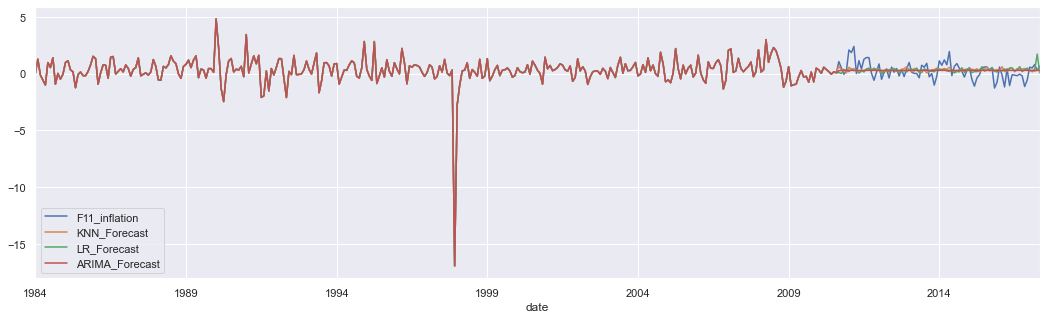

In [233]:
Final.plot(x='date', y=["F11_inflation", "KNN_Forecast","LR_Forecast","ARIMA_Forecast"], figsize=(18,5))

To better visualize the data, we will now analyze the last 15 years of the dataset. 

<AxesSubplot:xlabel='date'>

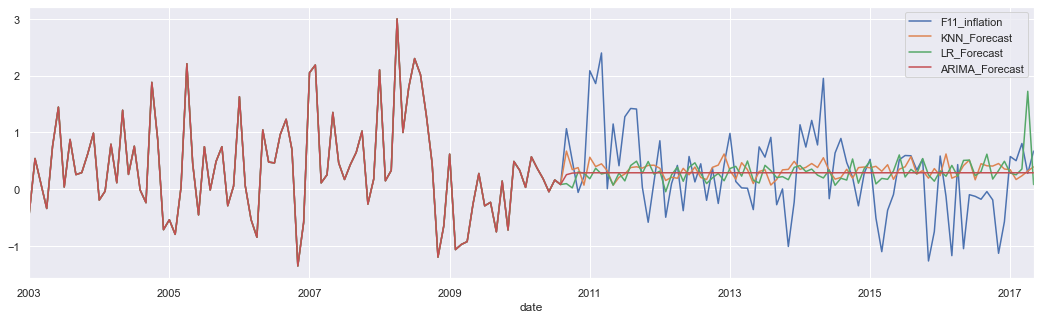

In [234]:
FinalShort = Final[Final.year > 2002]
FinalShort.plot(x='date', y=["F11_inflation", "KNN_Forecast","LR_Forecast","ARIMA_Forecast"], figsize=(18,5))

All forecasted data appears to hover around the 0.29% monthly inflation rate line. 

Now we will calculate what the forecasted spend of groceries would be compared to what they actually are for the first historical dataset. 

In [236]:
#Combine the forecasted data and the historic dataset together
Compare = pd.merge(Final, historic, how="inner", on=["date"])
Compare.head()

,date,year_x,month_x,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast,Spend,month_y,year_y
0,1990-10-01,1990,10,143.960000,0.520000,134.883077,0.319231,0.319231,0.319231,0.319231,15.6307,10,1990
1,1990-11-01,1990,11,144.513333,0.553333,135.531538,0.648462,0.648462,0.648462,0.648462,15.6957,11,1990
2,1990-12-01,1990,12,145.366667,0.853333,135.268462,-0.263077,-0.263077,-0.263077,-0.263077,15.4718,12,1990
3,1991-01-01,1991,1,146.713333,1.346667,138.712214,3.443752,3.443752,3.443752,3.443752,15.5039,1,1991
4,1991-02-01,1991,2,147.766667,1.053333,138.778626,0.066412,0.066412,0.066412,0.066412,15.1699,2,1991


In [237]:
#Remove unwanted columns
Compare.drop(['year_y', 'month_y','year_x', 'month_x','CPIO_Mean','F11_Mean'], axis=1, inplace=True)
Compare.head()

,date,CPIO_inflation,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast,Spend
0,1990-10-01,0.520000,0.319231,0.319231,0.319231,0.319231,15.6307
1,1990-11-01,0.553333,0.648462,0.648462,0.648462,0.648462,15.6957
2,1990-12-01,0.853333,-0.263077,-0.263077,-0.263077,-0.263077,15.4718
3,1991-01-01,1.346667,3.443752,3.443752,3.443752,3.443752,15.5039
4,1991-02-01,1.053333,0.066412,0.066412,0.066412,0.066412,15.1699


In [238]:
#Calculate spend usings the forecasted inflations rates and the first actual spend value
Compare['F11_Spend'] = ((Compare.F11_inflation + 100) / 100.).cumprod() * Spend[0]
Compare['CPIO_Spend'] = ((Compare.CPIO_inflation + 100) / 100.).cumprod() * Spend[0]
Compare['KNN_Spend'] = ((Compare.KNN_Forecast + 100) / 100.).cumprod() * Spend[0]
Compare['LR_Spend'] = ((Compare.LR_Forecast + 100) / 100.).cumprod() * Spend[0]
Compare['ARIMA_Spend'] = ((Compare.ARIMA_Forecast + 100) / 100.).cumprod() * Spend[0]

Compare.head()

,date,CPIO_inflation,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast,Spend,F11_Spend,CPIO_Spend,KNN_Spend,LR_Spend,ARIMA_Spend
0,1990-10-01,0.520000,0.319231,0.319231,0.319231,0.319231,15.6307,15.680598,15.711980,15.680598,15.680598,15.680598
1,1990-11-01,0.553333,0.648462,0.648462,0.648462,0.648462,15.6957,15.782281,15.798919,15.782281,15.782281,15.782281
2,1990-12-01,0.853333,-0.263077,-0.263077,-0.263077,-0.263077,15.4718,15.740761,15.933737,15.740761,15.740761,15.740761
3,1991-01-01,1.346667,3.443752,3.443752,3.443752,3.443752,15.5039,16.282834,16.148311,16.282834,16.282834,16.282834
4,1991-02-01,1.053333,0.066412,0.066412,0.066412,0.066412,15.1699,16.293648,16.318407,16.293648,16.293648,16.293648


<AxesSubplot:xlabel='date'>

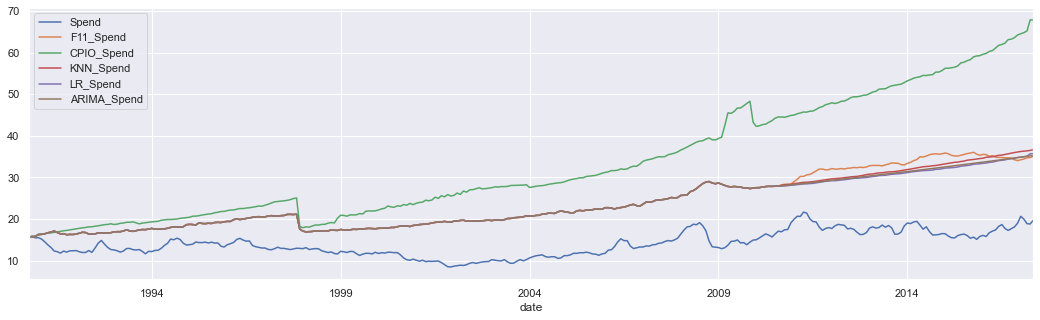

In [239]:
#Plot and compare the forecasted spend values to the actuals
Compare.plot(x='date', y=["Spend","F11_Spend","CPIO_Spend", "KNN_Spend","LR_Spend","ARIMA_Spend"], figsize=(18,5))

Now we will calculate what the forecasted spend of groceries would be compared to what they actually are for the second historical dataset. 

In [240]:
#Combine the forecasted data with the second historical spend dataset
Compare2 = pd.merge(Final, h2, how="inner", on=["date"])
Compare2.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast,Spend2
0,1990-01-01,1990,1,136.820000,2.091429,133.106923,4.827396,4.827396,4.827396,4.827396,64.1
1,1990-02-01,1990,2,137.400000,0.580000,135.374615,2.267692,2.267692,2.267692,2.267692,64.5
2,1990-03-01,1990,3,138.373333,0.973333,134.086154,-1.288462,-1.288462,-1.288462,-1.288462,63.8
3,1990-04-01,1990,4,139.246667,0.873333,131.630769,-2.455385,-2.455385,-2.455385,-2.455385,65.8
4,1990-05-01,1990,5,140.286667,1.040000,131.550769,-0.080000,-0.08,-0.08,-0.080000,64.4


In [241]:
Compare2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 328
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            329 non-null    datetime64[ns]
 1   year            329 non-null    int64         
 2   month           329 non-null    int64         
 3   CPIO_Mean       329 non-null    float64       
 4   CPIO_inflation  329 non-null    float64       
 5   F11_Mean        329 non-null    float64       
 6   F11_inflation   329 non-null    float64       
 7   KNN_Forecast    329 non-null    object        
 8   LR_Forecast     329 non-null    object        
 9   ARIMA_Forecast  329 non-null    float64       
 10  Spend2          329 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 30.8+ KB


In [242]:
#Update the spend type from object to float 
Compare2["Spend2"] = Compare2.Spend2.astype(float)


In [243]:
#Calculate spend usings the forecasted inflations rates and the first actual spend value
Compare2['F11_Spend'] = ((Compare2.F11_inflation + 100) / 100.).cumprod() * Compare2.Spend2[0]
Compare2['CPIO_Spend'] = ((Compare2.CPIO_inflation + 100) / 100.).cumprod() * Compare2.Spend2[0]
Compare2['KNN_Spend'] = ((Compare2.KNN_Forecast + 100) / 100.).cumprod() * Compare2.Spend2[0]
Compare2['LR_Spend'] = ((Compare2.LR_Forecast + 100) / 100.).cumprod() * Compare2.Spend2[0]
Compare2['ARIMA_Spend'] = ((Compare2.ARIMA_Forecast + 100) / 100.).cumprod() * Compare2.Spend2[0]

Compare2.head()

,date,year,month,CPIO_Mean,CPIO_inflation,F11_Mean,F11_inflation,KNN_Forecast,LR_Forecast,ARIMA_Forecast,Spend2,F11_Spend,CPIO_Spend,KNN_Spend,LR_Spend,ARIMA_Spend
0,1990-01-01,1990,1,136.820000,2.091429,133.106923,4.827396,4.827396,4.827396,4.827396,64.1,67.194361,65.440606,67.194361,67.194361,67.194361
1,1990-02-01,1990,2,137.400000,0.580000,135.374615,2.267692,2.267692,2.267692,2.267692,64.5,68.718122,65.820161,68.718122,68.718122,68.718122
2,1990-03-01,1990,3,138.373333,0.973333,134.086154,-1.288462,-1.288462,-1.288462,-1.288462,63.8,67.832715,66.460811,67.832715,67.832715,67.832715
3,1990-04-01,1990,4,139.246667,0.873333,131.630769,-2.455385,-2.455385,-2.455385,-2.455385,65.8,66.167161,67.041235,66.167161,66.167161,66.167161
4,1990-05-01,1990,5,140.286667,1.040000,131.550769,-0.080000,-0.08,-0.08,-0.080000,64.4,66.114228,67.738464,66.114228,66.114228,66.114228


<AxesSubplot:xlabel='date'>

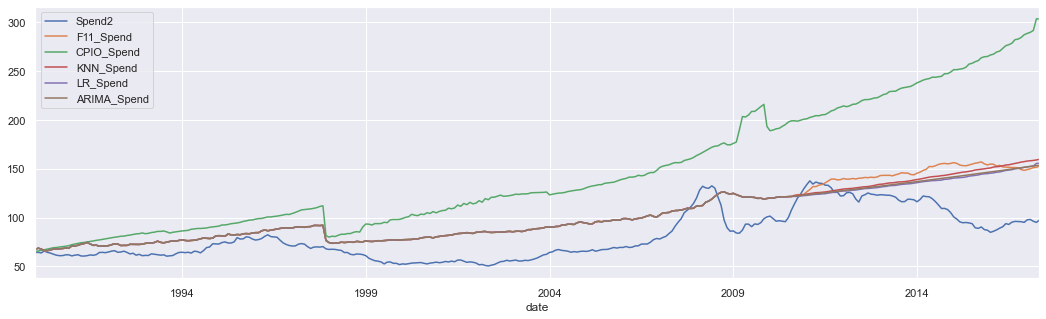

In [353]:
#Plot and compare the forecasted spend values to the actuals
Compare2.plot(x='date', y=["Spend2","F11_Spend","CPIO_Spend", "KNN_Spend","LR_Spend","ARIMA_Spend"], figsize=(18,5))

## Conclusion 

In conclusion, all three models over estimated the price for food and beverage spend for both datasets. The Prices were about 33-66% higher than the actuals. However, the data did show that market basket CPI data can be used to predict food and beverage data. This can be seen when analyzing the forecasted spend data to the F11 spend dataset. Two of the three models were trained using the market basket CPI data and both of those models came close to what the F11 spend data forecast was. Therefore, for organization to accurately and more robustly forecast their budgets, they should use all of their own historical spend data, no matter the commodity, to train any of the three machine learning models used during this project (KNN, Linear Regression or ARIMA) and they will most likely create a robust enough model to forecast their future budgets. 